## 1. 음주 여부에 따라 건강검진 수치 차이가 있을까?

## 2. 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?


## 3. 라이브러리 로드

In [2]:
# 분석 pandas / 수치계산 numpy / 시각화 seaborn
# 구 버전에서는 #matplotlib inline 설정이 되어야 그래프를 시각화

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 4. 한글폰트 설정

In [ ]:
# # Google Colab 사용 시 아래 주석 제거 후 폰트 설정
# # 로컬 아나콘다는 주석

# # 나눔고딕 설치
# # 이 코드를 사용시 아래 있는 폰트를 로드할 경우 colab에서는 오류
# # 아래 있는 폰트 설정은 꼭 주석처리

# !apt -qq -y install fonts-nanum > /dev/null
# import matplotlib.font.manager as fm
# fontpath = '/usr/shere/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, sixe = 9)
# fm._rebuild()

# # colab 한글폰트 설정
# plt.rc('font', family='NanumGothic')
# # 마이너스 폰트 깨짐 문제
# plt.rc("axes", unicode_minus=False)

In [3]:
# 한글폰트를 설정하지 않으면 그래프상 깨짐
# 한글이 출력될 수 있도록 폰트 설정
# 운영체제별 설정을 위해 로드
import os

#위도우, 맥 외 OS 는 별도 설정
if os.name == 'posix' :
    plt.rc("font", family="AppleGothic")
else :
    plt.rc("font", family="Malgun Gothic")

# 마이너스 폰트 깨짐 문제
plt.rc("axes", unicode_minus=False)

# 레티나 설정 시 글자가 선명
# 폰트 주변이 흐릿하게 보이는 것 방지
%config InlineBackend.figure_format = 'retina'

## 5. 데이터 불러오기
    - 건강검진정보란 국민건강보험의 직장가입자와 40세 이상의 피부양자, 세대주인 지역가입자와 40세 이상의 지역가입자의 일반건강검진 결과와 이들 일반건강검진 대상자 중에 만40세와 만66세에 도달한 이들이 받게 되는 생애전환기건강진단 수검이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 검진내역(신장, 체중, 총콜레스테롤, 혈색소 등)으로 구성된 개방데이터입니다.
    - 공공데이터 개방서비스에서 다운로드 가능

In [5]:
# 파일  읽음
# 행과 열의 수 출력
df = pd.read_csv("../Data/NHIS_OPEN_GJ_2017.CSV", encoding="cp949")

df.shape

(1000000, 34)

### 5.1 데이터 미리 보기

In [8]:
# sample | head | tail

df.head()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  시력(좌)  \
0  2017        1     1           13    46      170.0        65.0  91.0    1.0   
1  2017        2     2            8    41      150.0        45.0  73.4    1.2   
2  2017        3     1            8    45      175.0        75.0  94.0    1.0   
3  2017        4     2           12    11      155.0        55.0  67.5    0.9   
4  2017        5     1            8    41      175.0        75.0  93.0    1.5   

   시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  치아마모증유무  \
0    1.2  ...   25.0   3.0   0.0          1      NaN    NaN      NaN   
1    1.0  ...   10.0   1.0   0.0          1      NaN    NaN      NaN   
2    0.8  ...  136.0   1.0   0.0          1      NaN    NaN      NaN   
3    1.0  ...   30.0   1.0   1.0          0      NaN    NaN      NaN   
4    1.5  ...   68.0   3.0   0.0          0      NaN    NaN      NaN   

   제3대구치(사랑니)이상   치석   데이터공개일자  
0           NaN  1.0  20181126  
1           NaN  1.0  20181126  
2           NaN  0.0  20181126  
3           NaN  NaN  20181126  
4           NaN  NaN  20181126  

[5 rows x 34 columns]

In [9]:
df.tail()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
999995  2017   999996     2            9    41      165.0        55.0  70.0   
999996  2017   999997     2            9    11      165.0        50.0  68.0   
999997  2017   999998     2           12    27      155.0        50.0  83.8   
999998  2017   999999     1           11    47      160.0        70.0  99.0   
999999  2017  1000000     2            9    27      165.0        60.0  74.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
999995    1.5    1.5  ...   11.0   1.0   1.0          0      NaN    NaN   
999996    1.2    1.5  ...   11.0   1.0   0.0          1      NaN    NaN   
999997    0.2    1.0  ...   12.0   1.0   0.0          1      NaN    NaN   
999998    0.8    0.9  ...   35.0   2.0   1.0          0      NaN    NaN   
999999    1.2    1.2  ...   15.0   1.0   0.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
999995      NaN           NaN  NaN  20181126  
999996      NaN           NaN  0.0  20181126  
999997      NaN           NaN  0.0  20181126  
999998      NaN           NaN  NaN  20181126  
999999      NaN           NaN  NaN  20181126  

[5 rows x 34 columns]

In [10]:
df.sample()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
426897  2017   426898     2            9    42      150.0        40.0  65.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
426897    1.2    1.2  ...   15.0   1.0   0.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상  치석   데이터공개일자  
426897      NaN           NaN NaN  20181126  

[1 rows x 34 columns]

## 6. 기본정보 보기

In [11]:
# 데이터 크기, 형식, 메모리 사용량 등
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [13]:
# 컬럼만
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [14]:
# 데이터 형식
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)       float64
체중(5Kg 단위)      float64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진 수검여부         int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

## 7. 결측치 보기

In [19]:
# isnull →결측치 bool 값 sum : 컬럼마다 결측치 수
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

<Axes: >

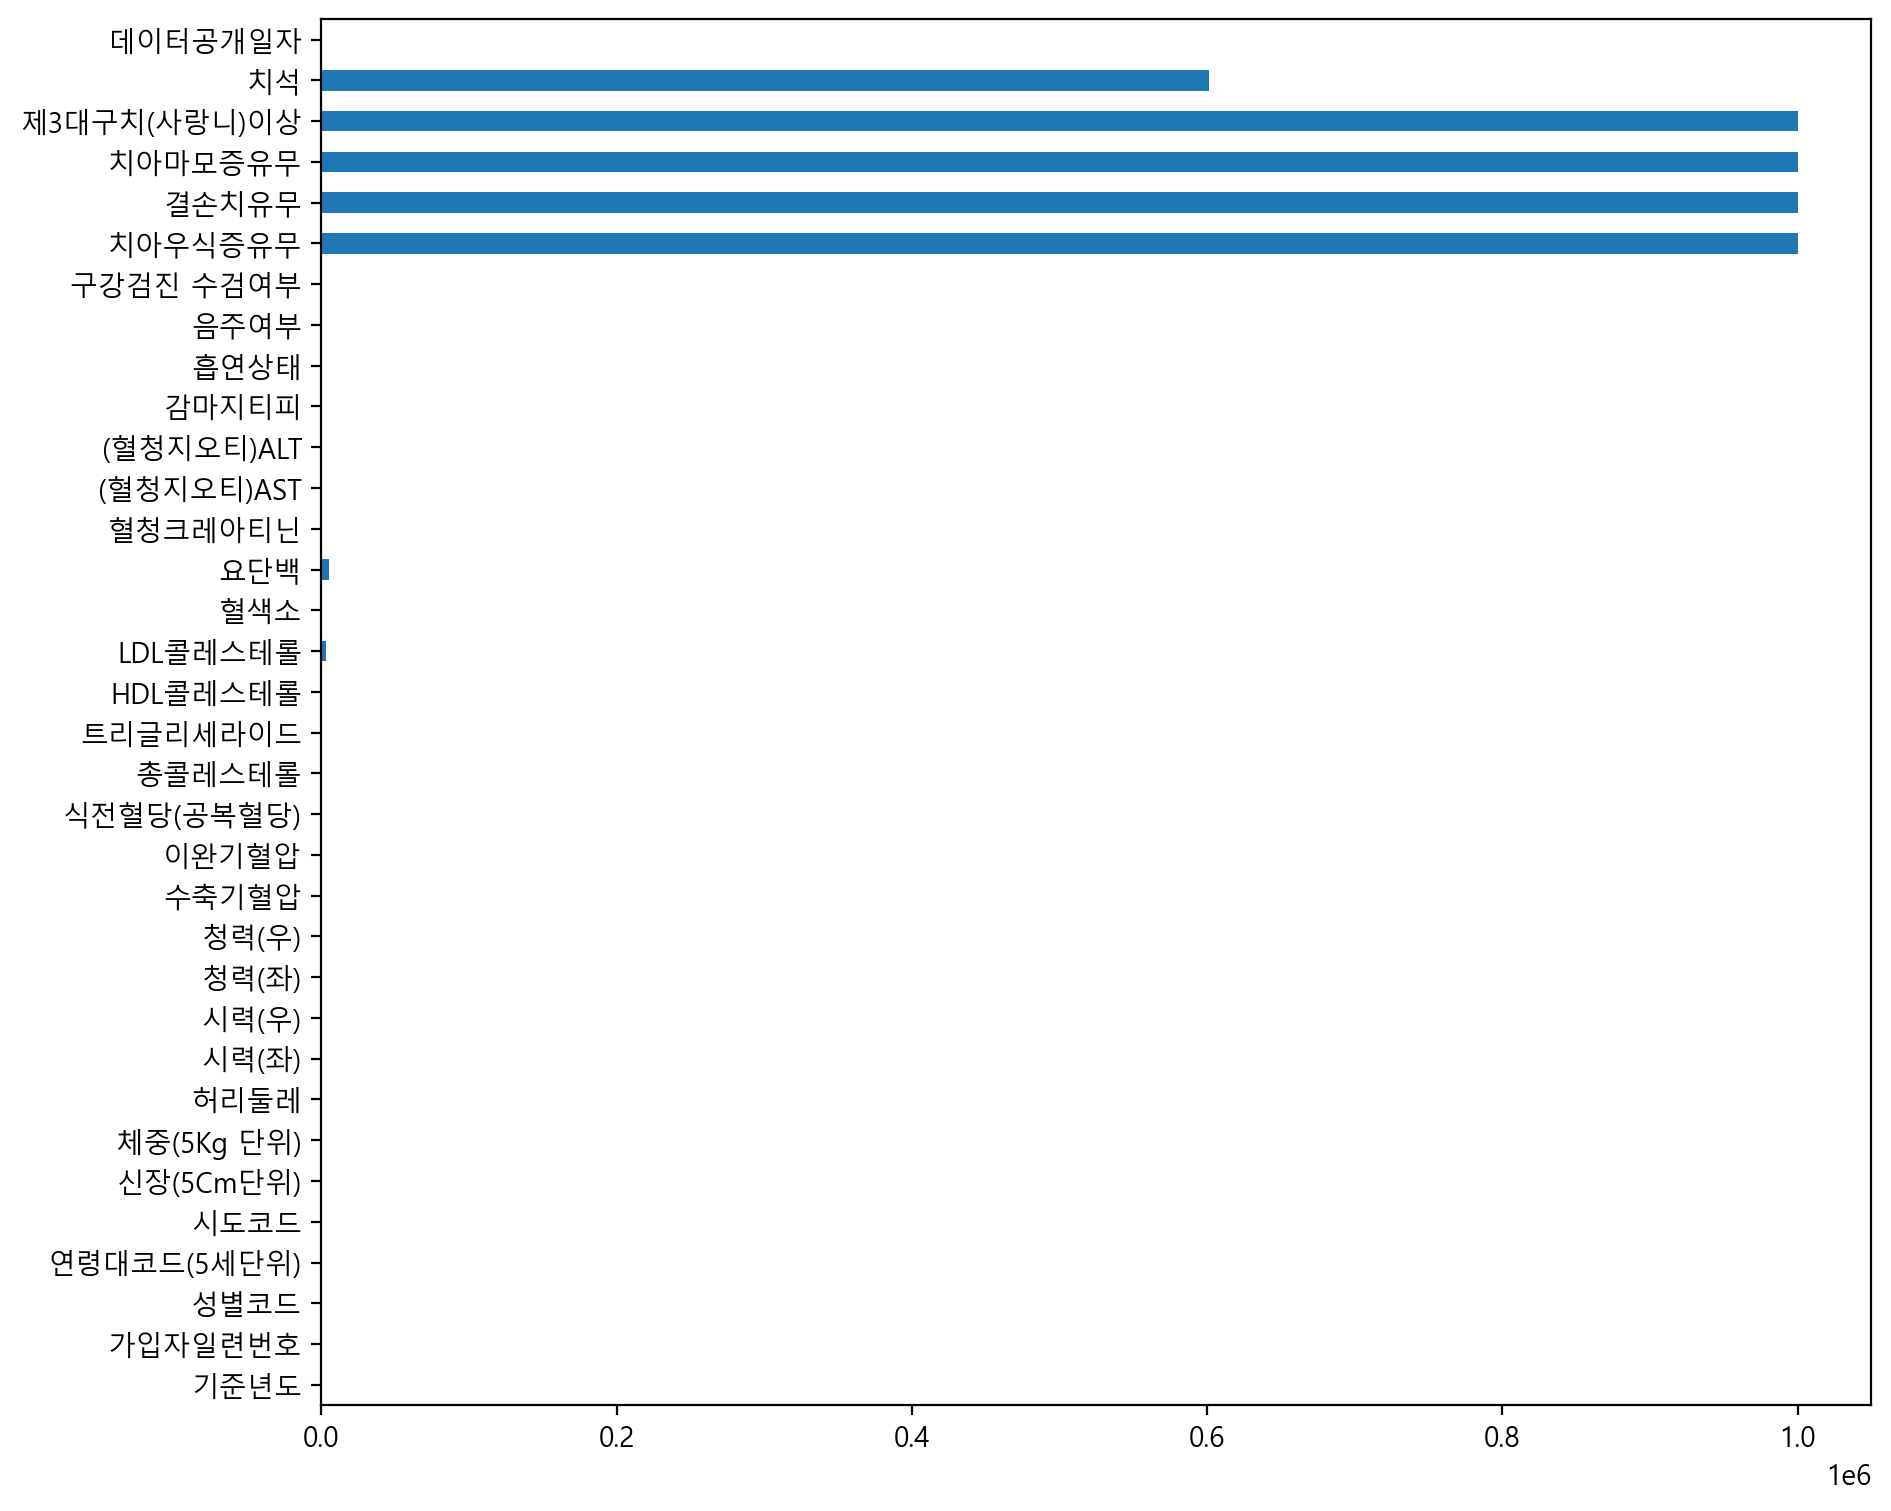

In [22]:
# 시각화
df.isnull().sum().plot.barh(figsize=(10, 9))

## 8. 일부 데이터 요약

In [24]:
# "(혈청지오티)ALT", "(혈청지오티)AST"

df[["(혈청지오티)ALT", "(혈청지오티)AST"]]

(혈청지오티)ALT  (혈청지오티)AST
0             41.0        19.0
1             13.0        16.0
2             62.0        45.0
3             24.0        21.0
4             62.0        37.0
...            ...         ...
999995        11.0        18.0
999996        11.0        21.0
999997        13.0        23.0
999998        30.0        28.0
999999        20.0        21.0

[1000000 rows x 2 columns]

In [26]:
# 요약
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].info()
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  999956 non-null  float64
 1   (혈청지오티)AST  999958 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


(혈청지오티)ALT     (혈청지오티)AST
count  999956.000000  999958.000000
mean       25.859343      26.075068
std        25.814268      24.437136
min         1.000000       1.000000
25%        15.000000      19.000000
50%        20.000000      23.000000
75%        30.000000      28.000000
max      6710.000000    9999.000000

## 9. value_counts 값 집계

In [27]:
df["성별코드"].value_counts()

성별코드
1    531172
2    468828
Name: count, dtype: int64

In [28]:
df["흡연상태"].value_counts()

흡연상태
1.0    608587
3.0    215061
2.0    176192
Name: count, dtype: int64

## 10. grorpby와 privot_table

In [29]:
# groupby
df.groupby(["성별코드"]).mean()

기준년도        가입자일련번호  연령대코드(5세단위)      시도코드   신장(5Cm단위)  체중(5Kg 단위)  \
성별코드                                                                         
1     2017.0  499946.580386    10.324381  34.15184  168.516441   70.211016   
2     2017.0  500061.589758    10.783424  33.25853  155.078899   55.701656   

           허리둘레     시력(좌)     시력(우)     청력(좌)  ...      감마지티피      흡연상태  \
성별코드                                           ...                        
1     85.171843  1.035268  1.034448  1.032813  ...  49.446249  2.058548   
2     77.061441  0.915023  0.910340  1.031968  ...  23.396111  1.094082   

          음주여부  구강검진 수검여부  치아우식증유무  결손치유무  치아마모증유무  제3대구치(사랑니)이상        치석  \
성별코드                                                                         
1     0.670136   0.433298      NaN    NaN      NaN           NaN  0.640683   
2     0.300790   0.359603      NaN    NaN      NaN           NaN  0.549563   

         데이터공개일자  
성별코드              
1     20181126.0  
2     20181126.0  

[2 rows x 33 columns]

In [30]:
df.groupby(["성별코드"]).count()

기준년도  가입자일련번호  연령대코드(5세단위)    시도코드  신장(5Cm단위)  체중(5Kg 단위)    허리둘레  \
성별코드                                                                        
1     531172   531172       531172  531172     531098      531098  531102   
2     468828   468828       468828  468828     468640      468634  468458   

       시력(좌)   시력(우)   청력(좌)  ...   감마지티피    흡연상태    음주여부  구강검진 수검여부  치아우식증유무  \
성별코드                          ...                                               
1     531047  531055  531064  ...  531154  531120  530976     531172        0   
2     468665  468666  468694  ...  468801  468720  468499     468828        0   

      결손치유무  치아마모증유무  제3대구치(사랑니)이상      치석  데이터공개일자  
성별코드                                                 
1         0        0             0  230156   531172  
2         0        0             0  168592   468828  

[2 rows x 33 columns]

In [31]:
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    531172
2    468828
Name: 가입자일련번호, dtype: int64

In [32]:
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     0.0     175150
      1.0     355826
2     0.0     327579
      1.0     140920
Name: 가입자일련번호, dtype: int64

In [33]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     0.0     34.710544
      1.0     56.707919
2     0.0     22.660238
      1.0     25.115149
Name: 감마지티피, dtype: float64

In [34]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   175139.0  34.710544  37.715218  1.0  18.0  25.0  38.0  999.0
     1.0   355819.0  56.707919  69.039084  1.0  24.0  37.0  63.0  999.0
2    0.0   327559.0  22.660238  25.181300  1.0  13.0  17.0  24.0  999.0
     1.0   140913.0  25.115149  35.870812  1.0  13.0  17.0  25.0  999.0

In [35]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    0.0   175139  34.710544    25.0
     1.0   355819  56.707919    37.0
2    0.0   327559  22.660238    17.0
     1.0   140913  25.115149    17.0

In [36]:
# pivot_table
df.pivot

<bound method DataFrame.pivot of         기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
0       2017        1     1           13    46      170.0        65.0  91.0   
1       2017        2     2            8    41      150.0        45.0  73.4   
2       2017        3     1            8    45      175.0        75.0  94.0   
3       2017        4     2           12    11      155.0        55.0  67.5   
4       2017        5     1            8    41      175.0        75.0  93.0   
...      ...      ...   ...          ...   ...        ...         ...   ...   
999995  2017   999996     2            9    41      165.0        55.0  70.0   
999996  2017   999997     2            9    11      165.0        50.0  68.0   
999997  2017   999998     2           12    27      155.0        50.0  83.8   
999998  2017   999999     1           11    47      160.0        70.0  99.0   
999999  2017  1000000     2            9    27      165.0        60.0  74.0   

        시력(좌)  시력(

In [37]:
df.pivot_table(index="성별코드", values="가입자일련번호", aggfunc="count")

가입자일련번호
성별코드         
1      531172
2      468828

In [38]:
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")

가입자일련번호
음주여부         
0.0    502729
1.0    496746

In [39]:
pd.pivot_table(df, index="음주여부", values="감마지티피")

감마지티피
음주여부           
0.0   26.858541
1.0   47.745678

In [40]:
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc=["mean", "median"])

mean median
          감마지티피  감마지티피
음주여부                  
0.0   26.858541   19.0
1.0   47.745678   30.0

In [41]:
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
음주여부                                                              
0.0   14.0  19.0  29.0  502698.0  999.0  26.858541  1.0  30.687404
1.0   19.0  30.0  53.0  496732.0  999.0  47.745678  1.0  63.103844

In [42]:
pd.pivot_table(df, index=["음주여부", "성별코드"], values="감마지티피", aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
음주여부 성별코드                                                              
0.0  1     18.0  25.0  38.0  175139.0  999.0  34.710544  1.0  37.715218
     2     13.0  17.0  24.0  327559.0  999.0  22.660238  1.0  25.181300
1.0  1     24.0  37.0  63.0  355819.0  999.0  56.707919  1.0  69.039084
     2     13.0  17.0  25.0  140913.0  999.0  25.115149  1.0  35.870812

## 11. 전체 데이터 시각화
    - 100만개가 넘는 데이터를 시각화 할 때는 groupby 혹은 pivot_table로 연산 후 시각화 권장
    - seaborn 과 같은 고급 통계 연산을 하는 그래프 사용시 느릴 수 있음

### 11.1 히스토그램
 - 판다스의 info를 통해 대부분 수치 데이터로 이루어 진 것 확인
 - 수치데이터를 bin 갯수만큼 그룹화 해서 도수분포표 생성 결과를 시각화
 - 수치데이터가 많아 판다스의 hist를 사용

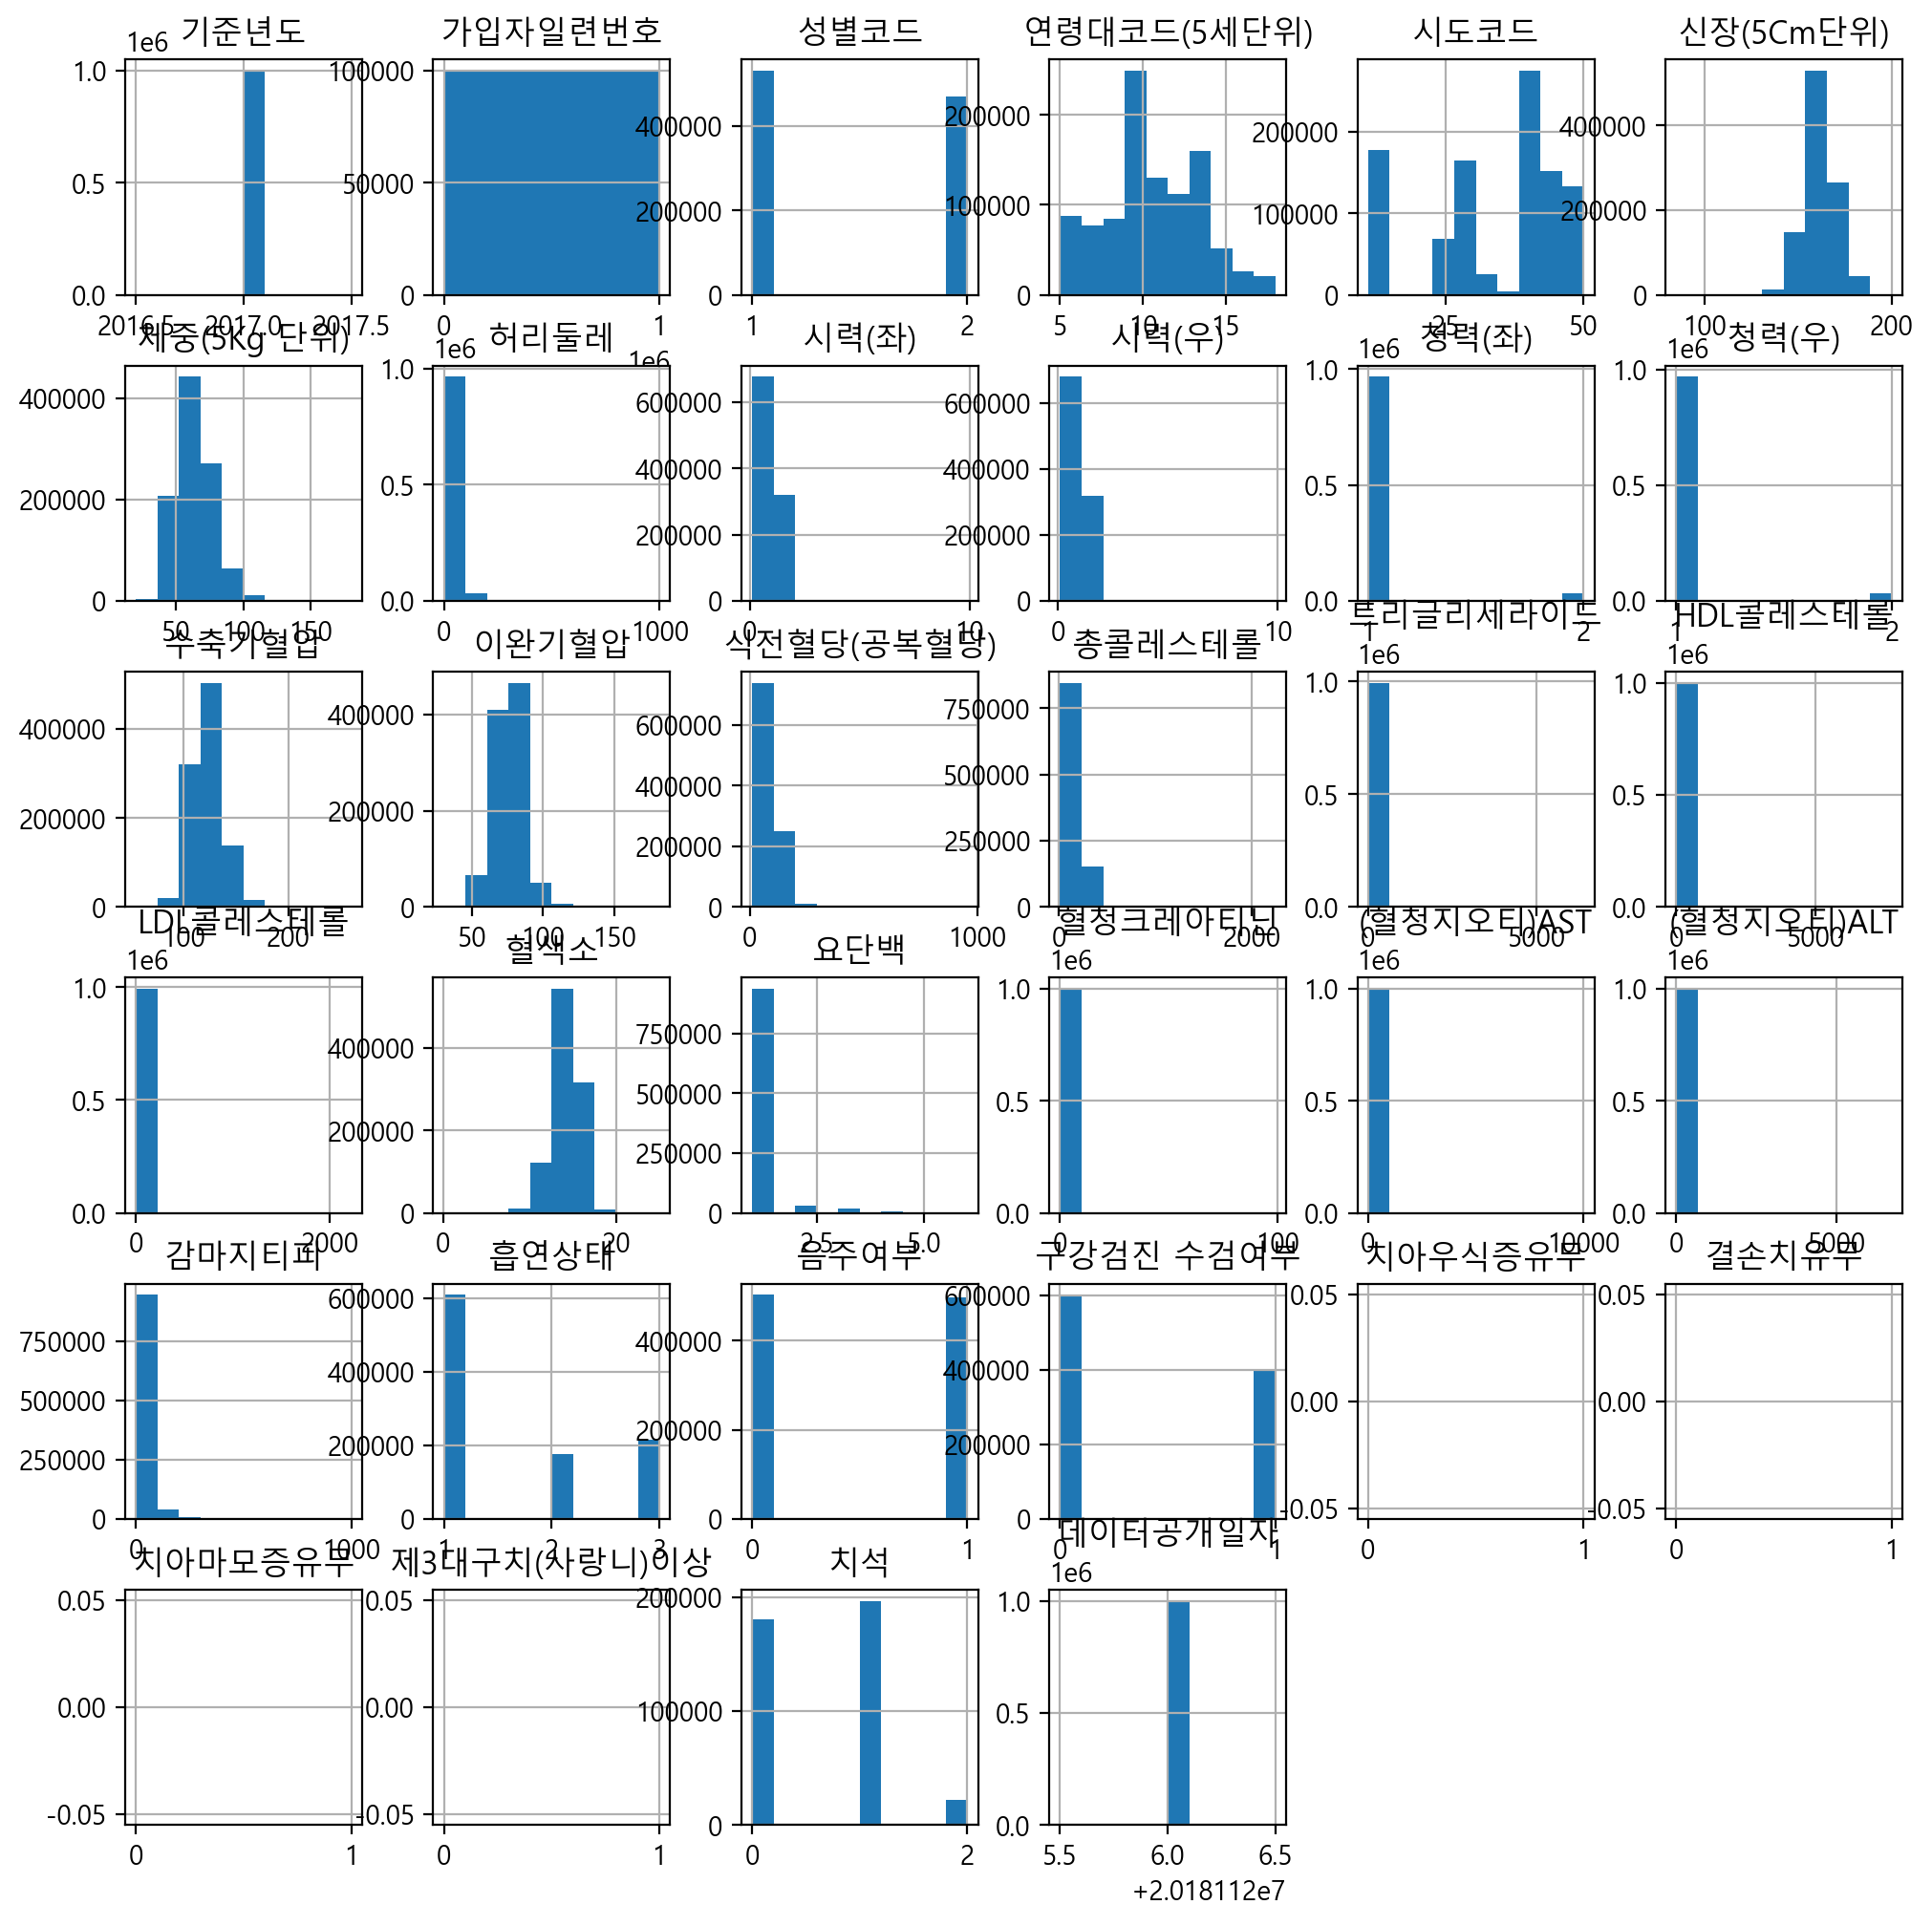

In [43]:
h = df.hist(figsize=(12, 12))

### 11.2 슬라이싱 사용해 히스토그램
- 슬라이싱: 데이터 나눔
- iloc 활용 : 인덱스의 순서대로 슬라이싱 가능
- lioc[행, 열] 해당 인덱스만 불러오고 전체 : [:,:]
- 대괄호 안의 콜론 앞뒤에 숫자 : 해당 시작인덱스:끝나는인덱스(+1) 지정

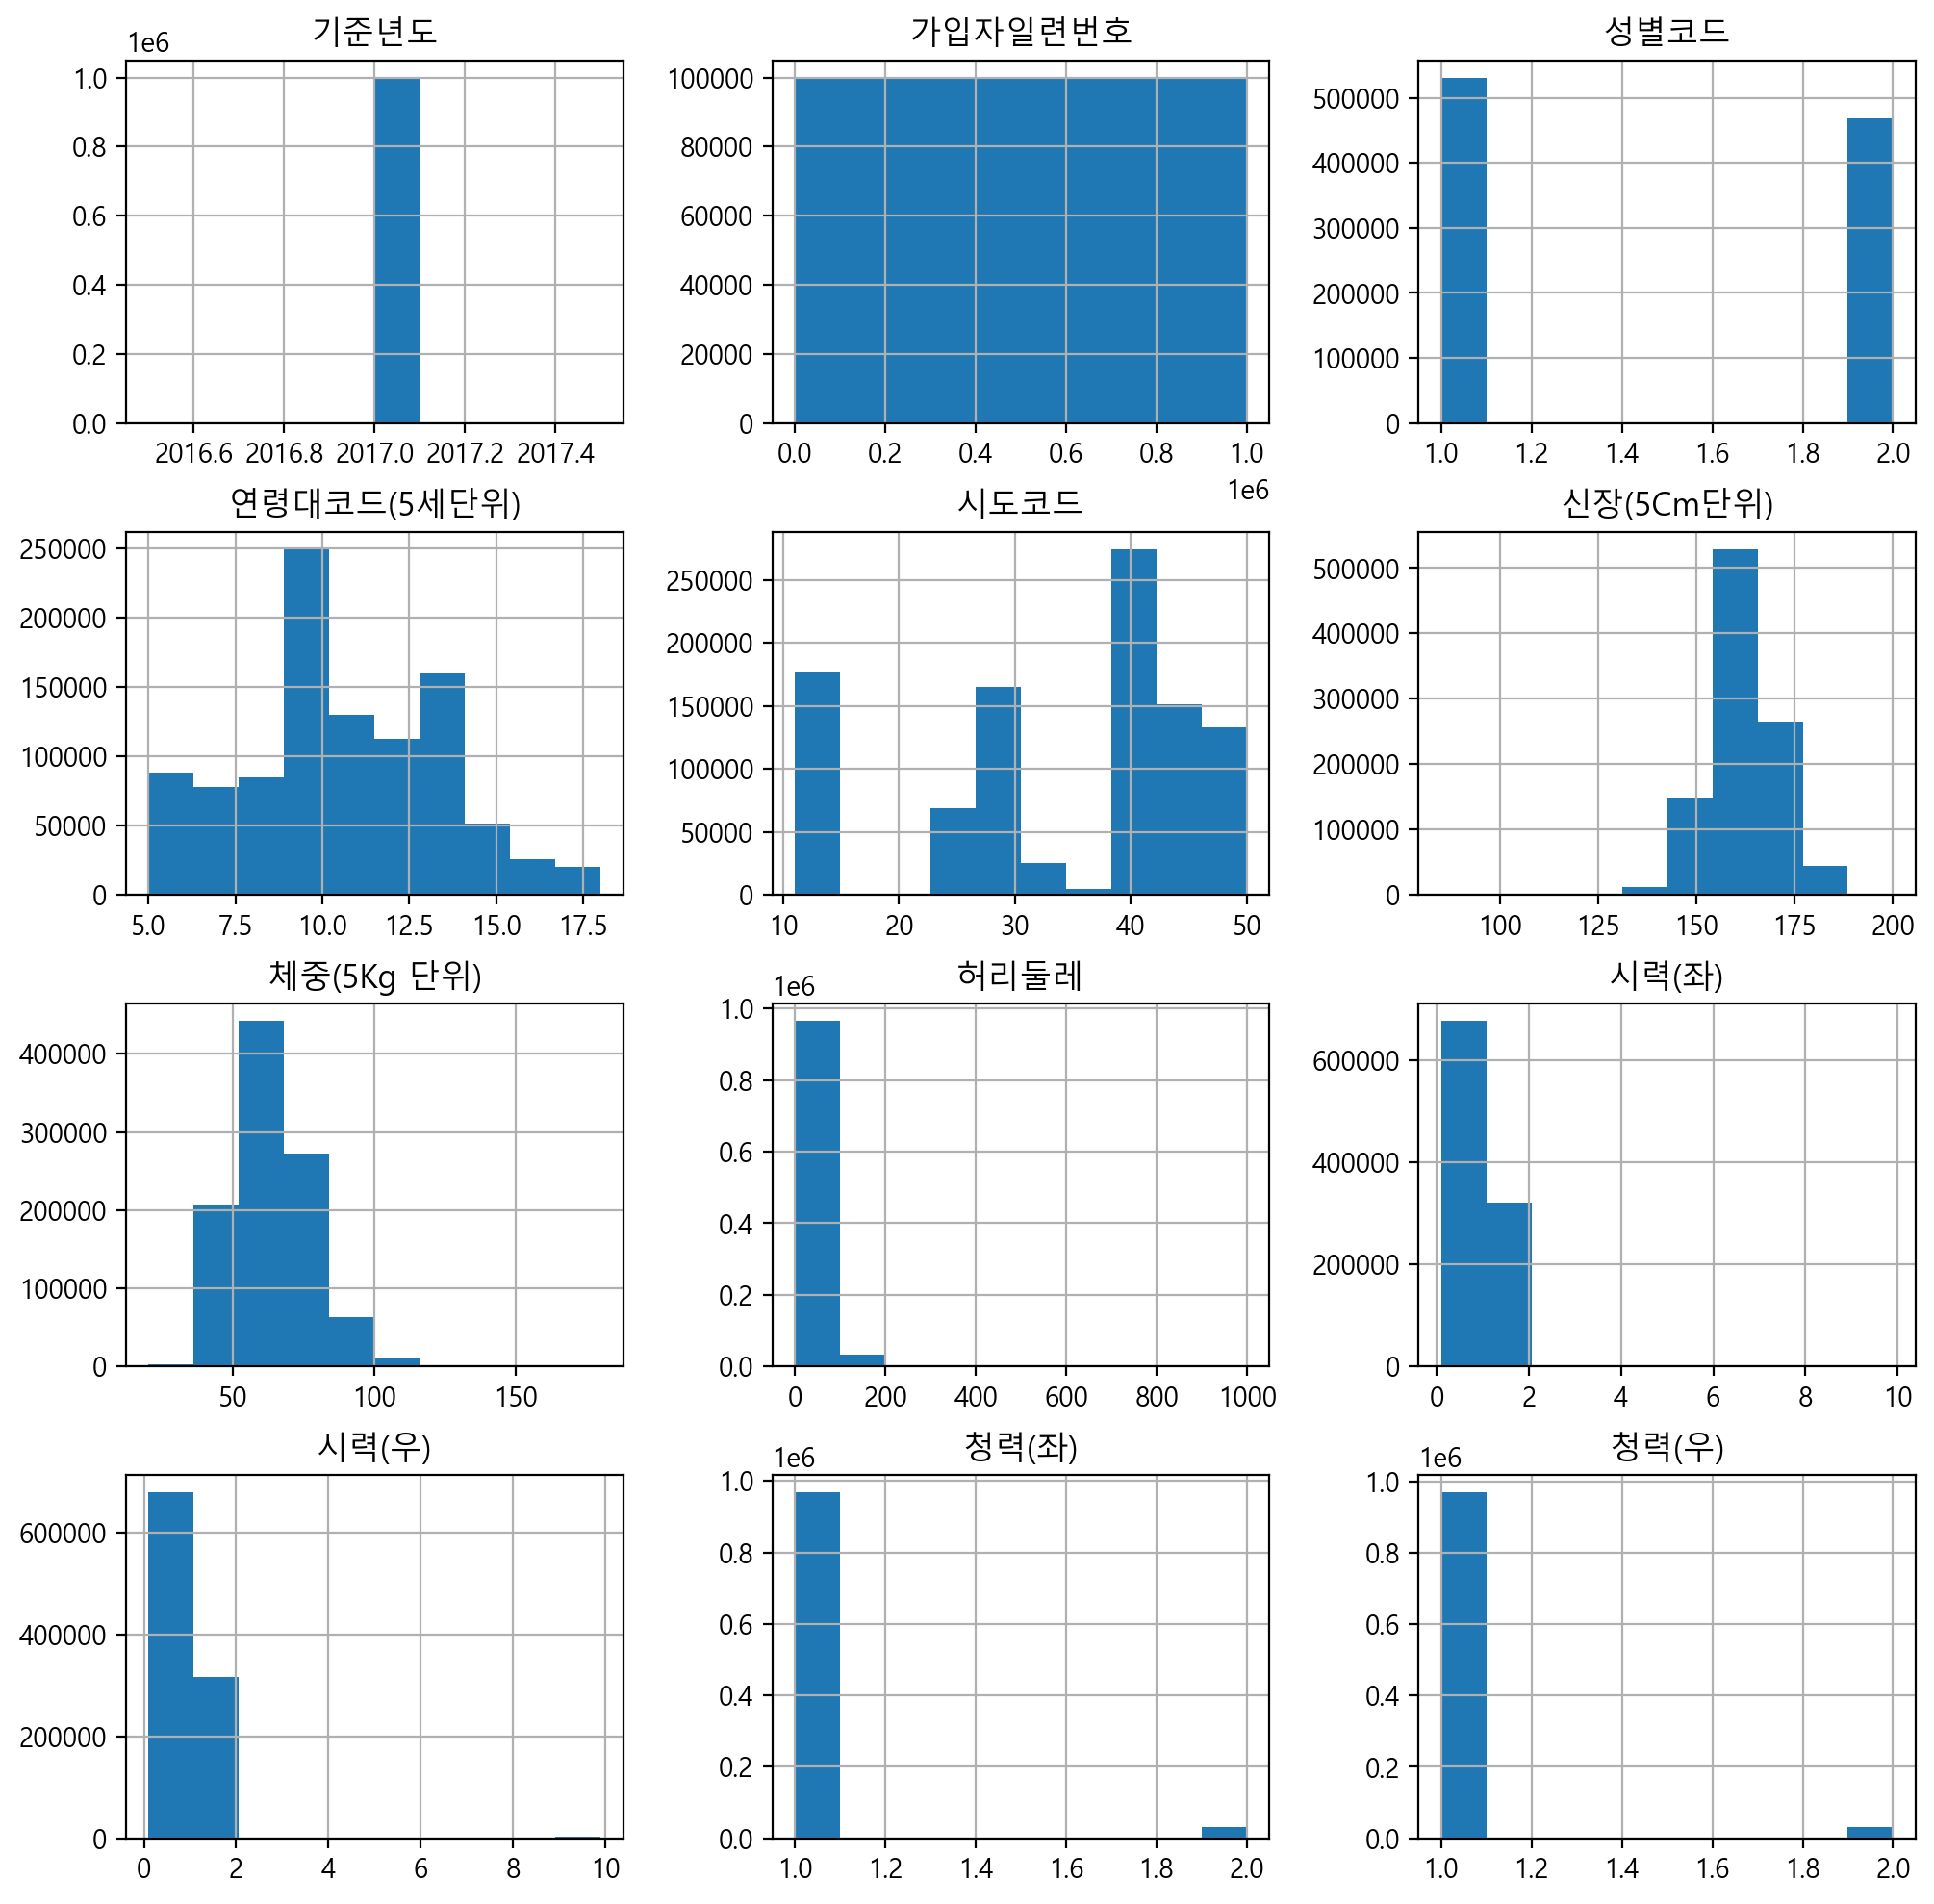

In [45]:
# 12개 컬럼
h = df.iloc[:, :12].hist(figsize=(12, 12))

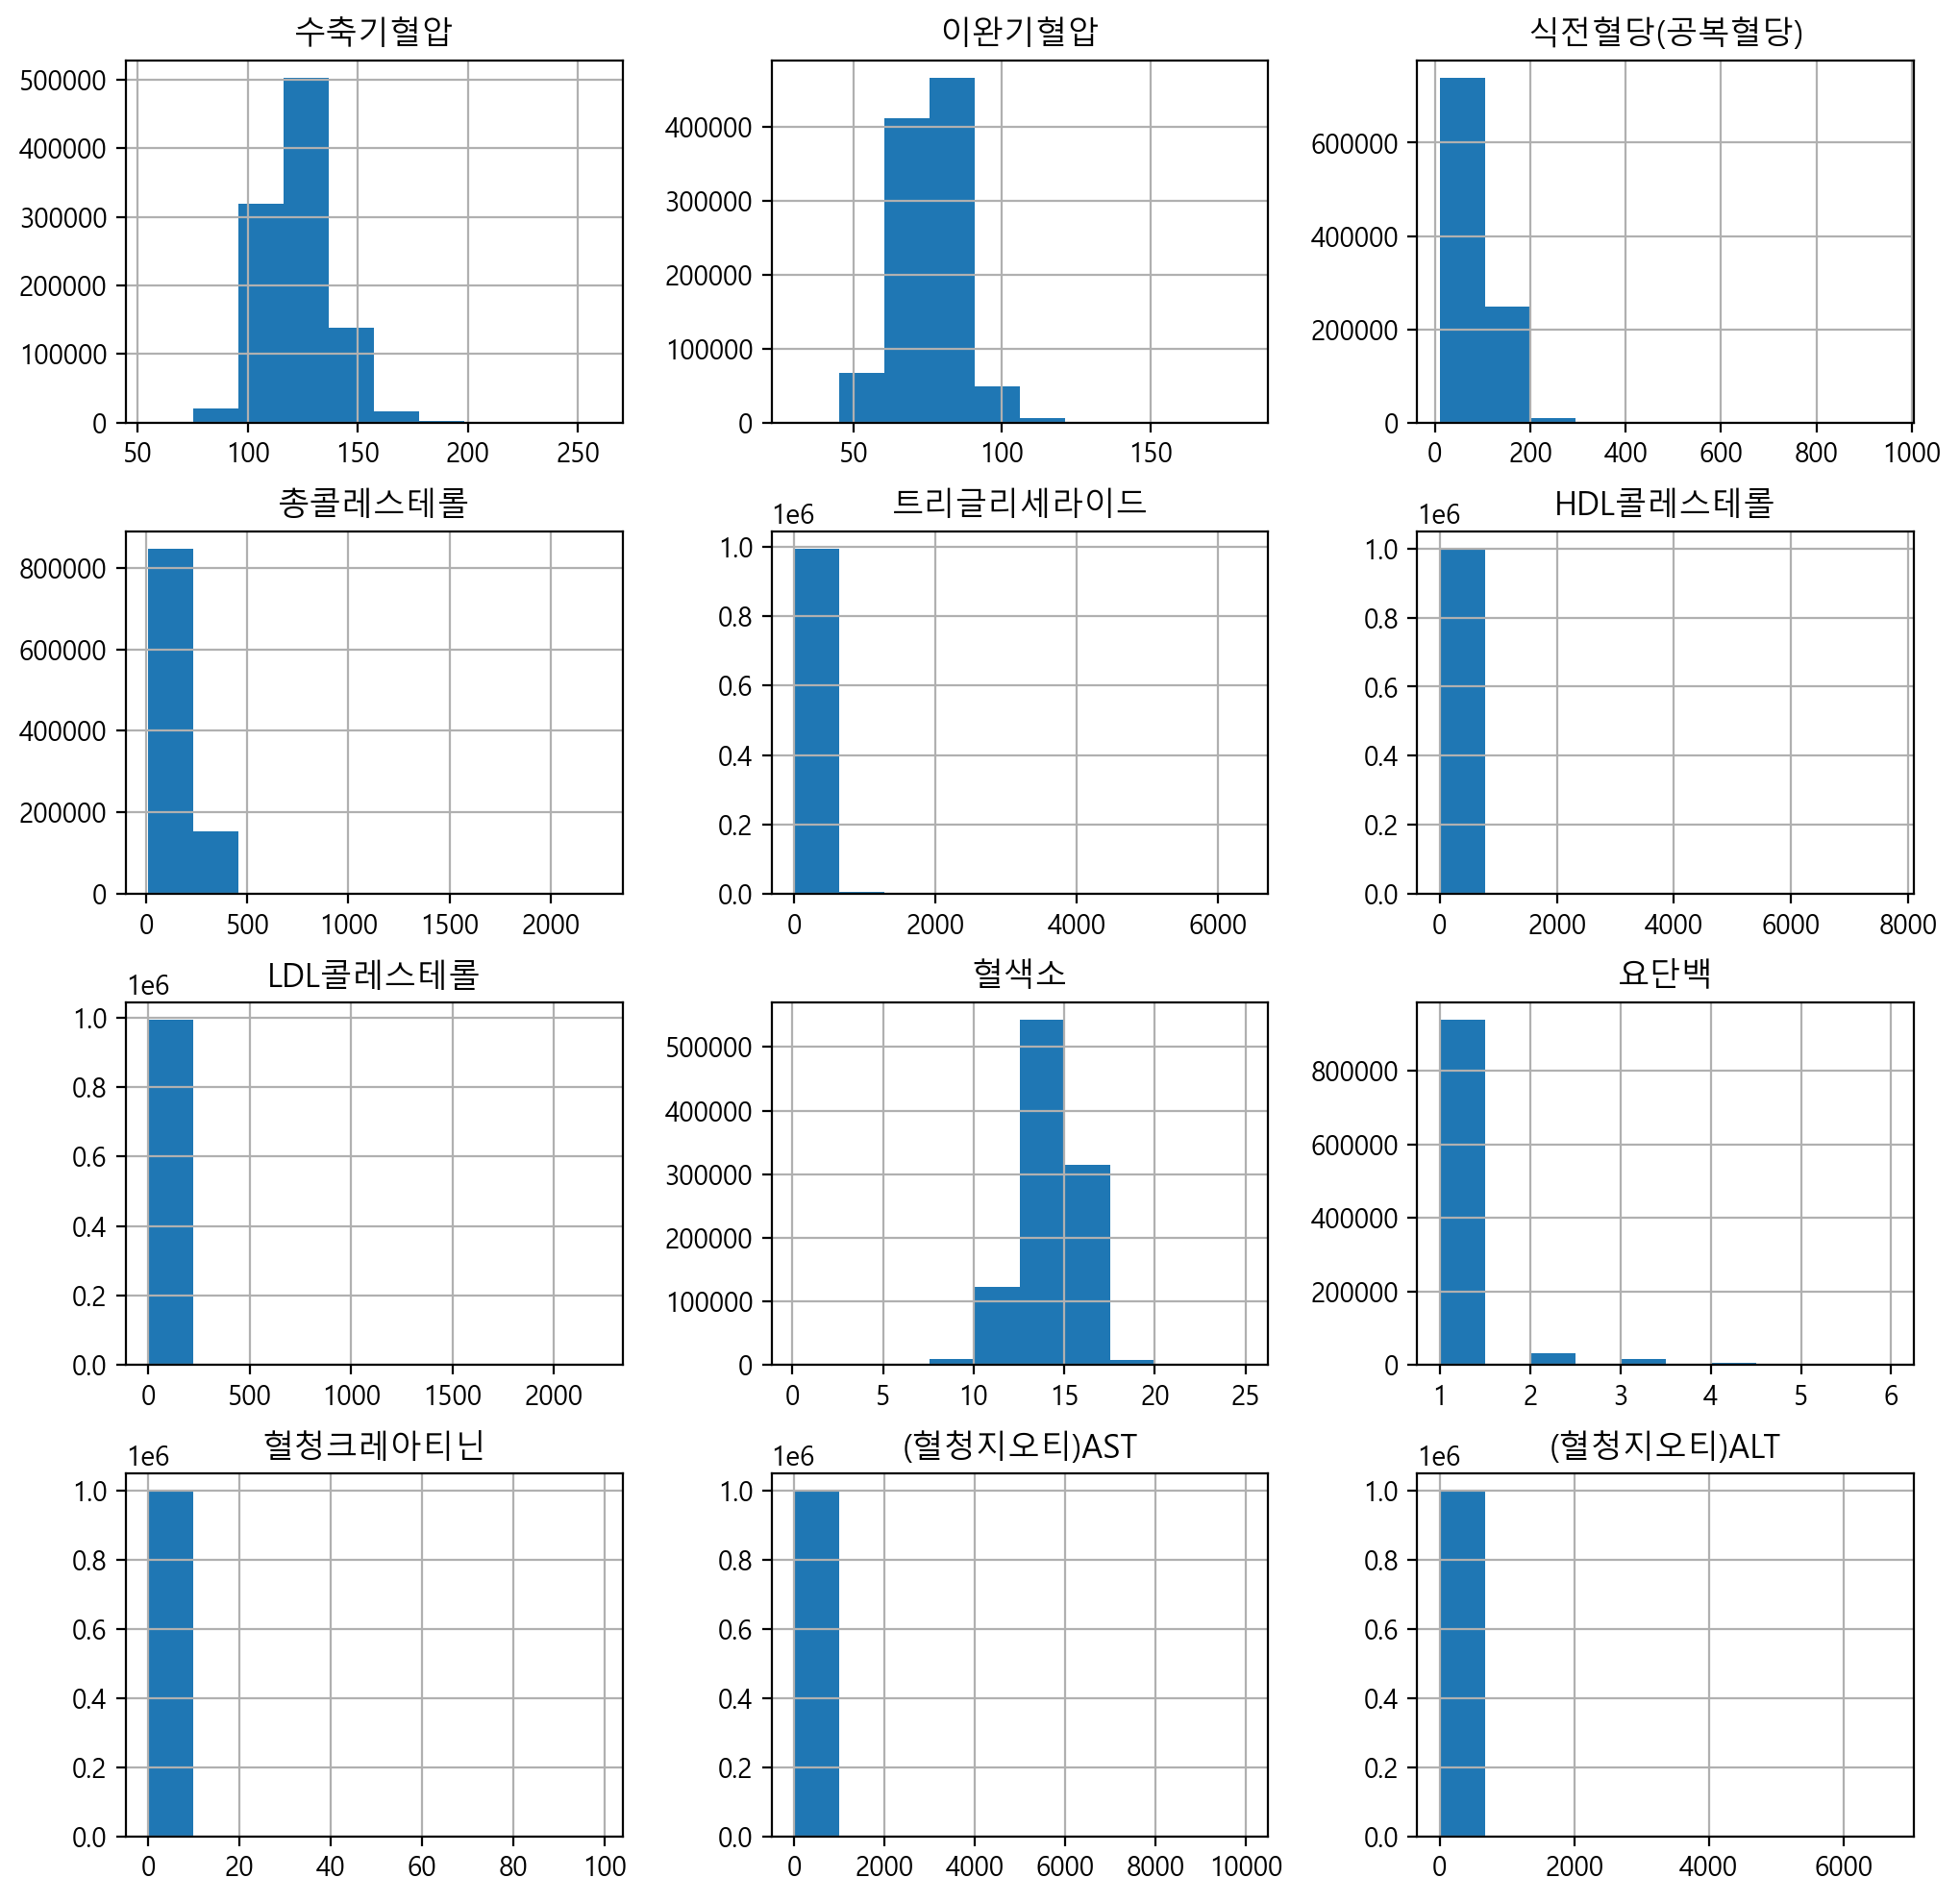

In [48]:
# 12행 ~ 23행
h = df.iloc[:, 12:24].hist(figsize=(12, 12))

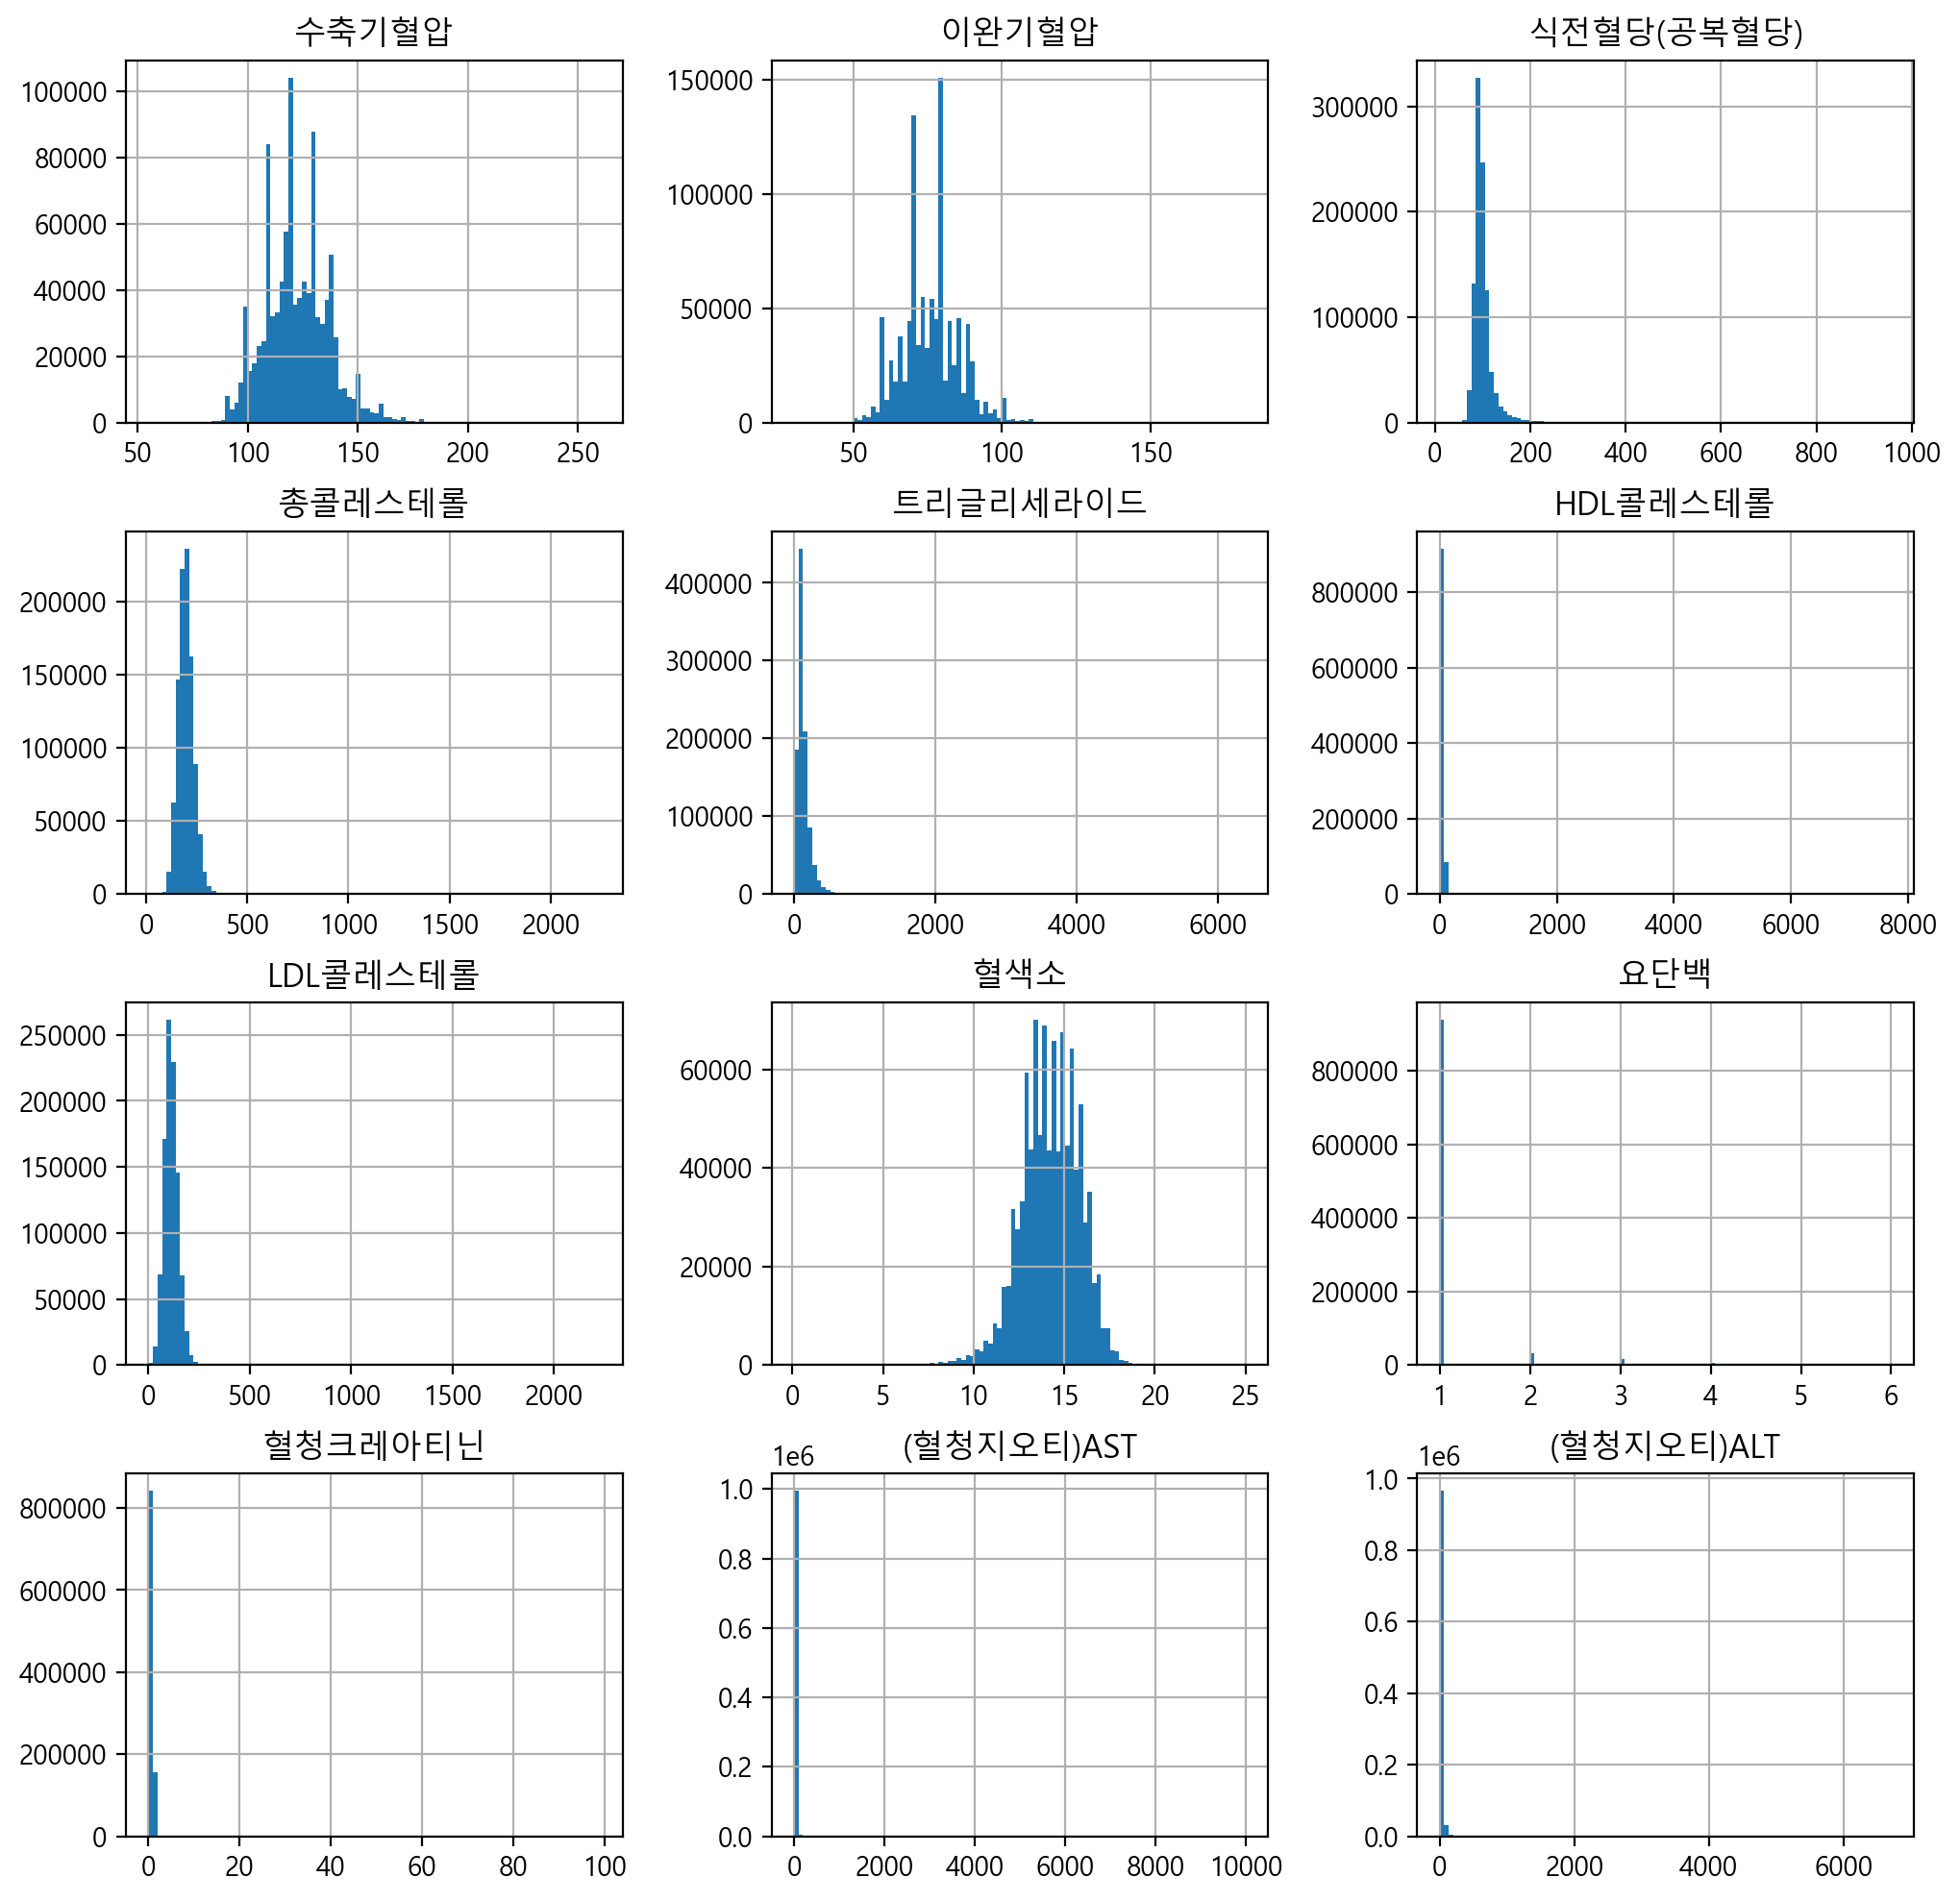

In [49]:
# 막대의 개수를 잘게
h = df.iloc[:, 12:24].hist(figsize=(12, 12), bins=100)

## 12. 샘플 데이터 추출

In [51]:
# 샘플 데이터 추출
# random_state : 샘플링 되는 값 고정

df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 34)

## 13. seaborn 사용
- 간단하게 고급 통계 연산 가능

## 14. 범주형 데이터(카테고리) 데이터 시각화
- countplot : 번주형 데이터의 수를 더한 값을 그래프로 표현
- value_counts 로 구한 값을 시각화

### 14.1 countplot_음주여부

<Axes: xlabel='음주여부'>

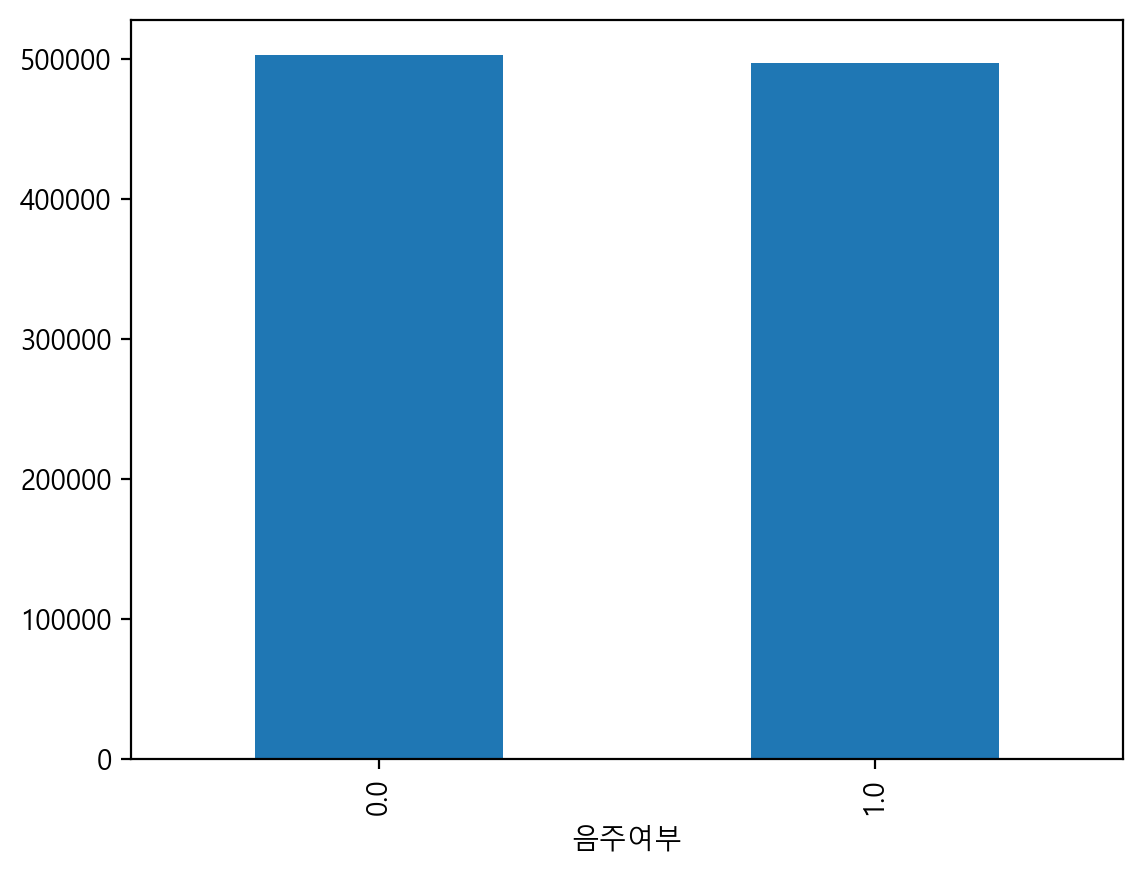

In [52]:
df["음주여부"].value_counts().plot.bar()

### 14.2 hue 옵션 사용

<Axes: xlabel='음주여부', ylabel='count'>

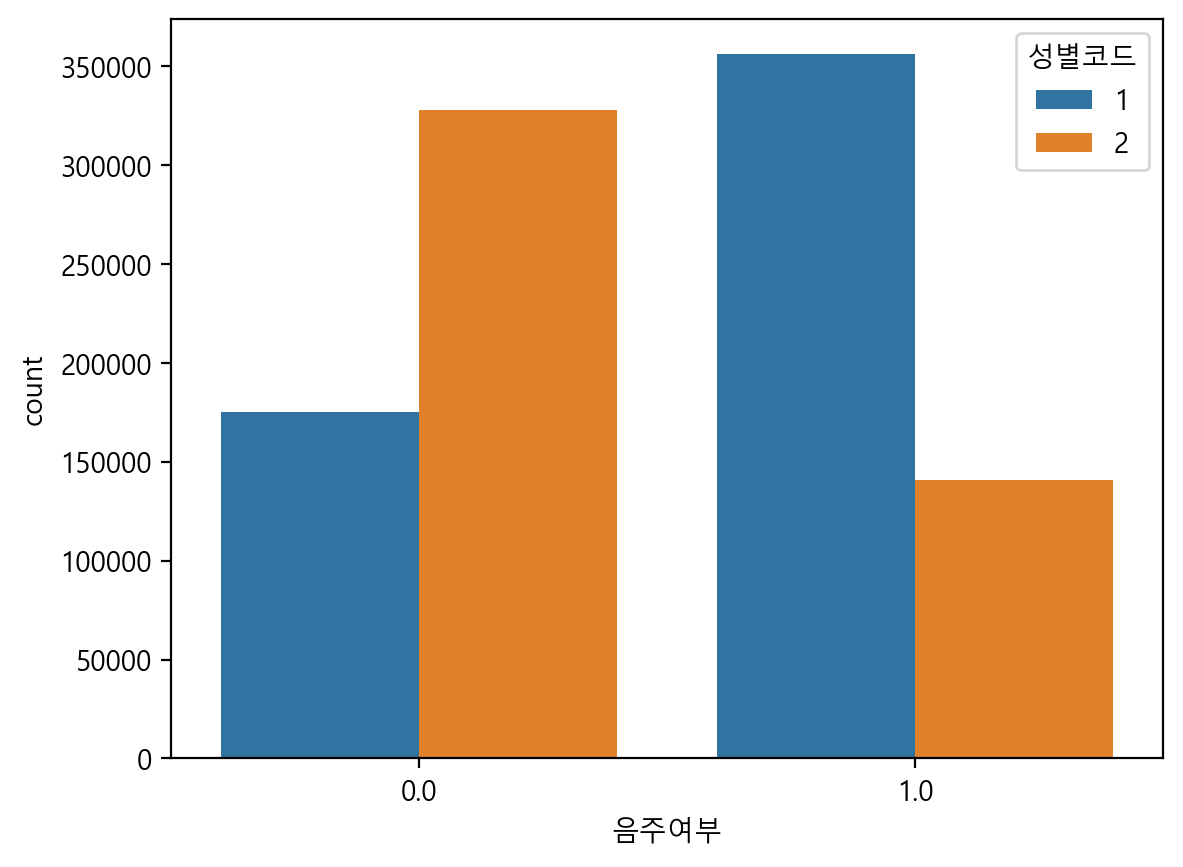

In [53]:
# 음주 여부에 따른 countplot hue=성별코드
# hue 색상
# seaborn에서 제공하는 폰트 설정 사용 가능
# seaborn 스타일 적용
# Mac : sns.set(font_scale=1.5, font="AppleGothic")
# Window : sns.set(font_scale=1.5, font="Malgun Gothic")
sns.countplot(data=df, x="음주여부", hue="성별코드")

<Axes: xlabel='연령대코드(5세단위)', ylabel='count'>

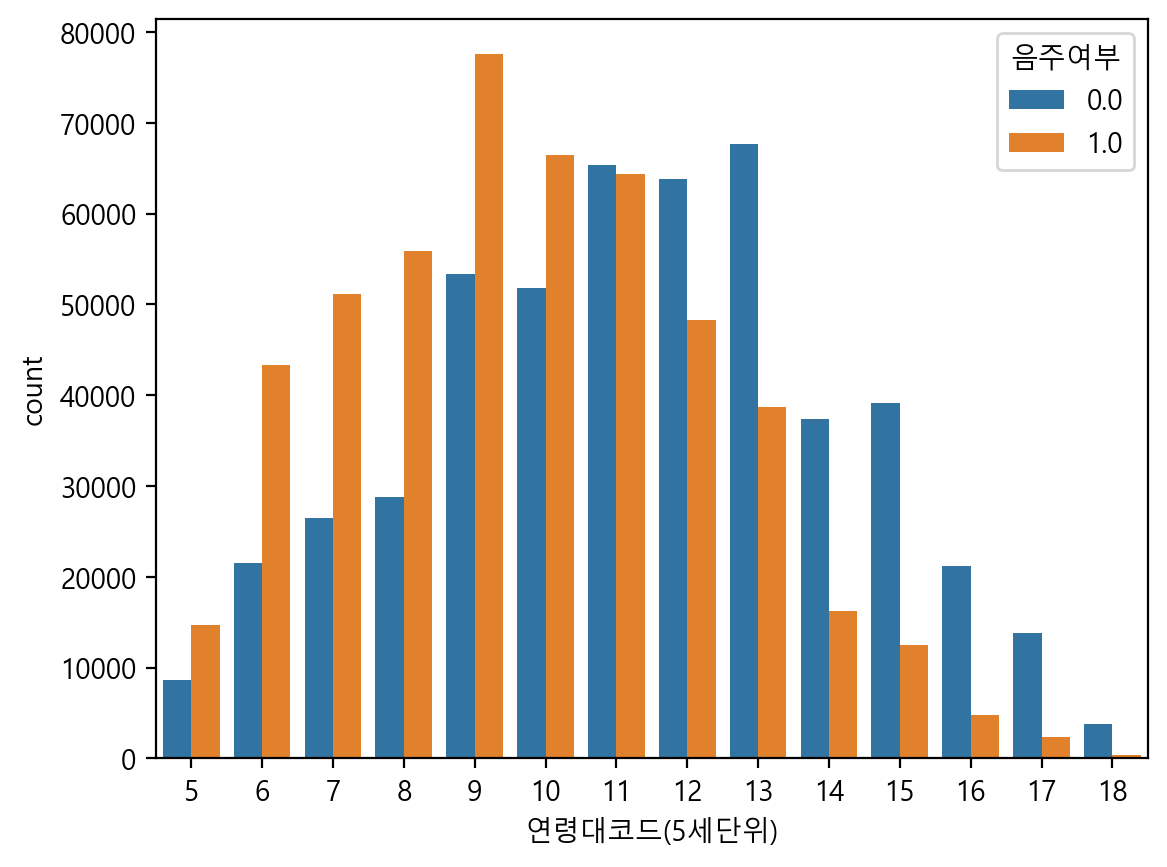

In [56]:
# countplot 연령대별 음주여부
sns.countplot(data=df, x="연령대코드(5세단위)", hue="음주여부")

### 14.3 counplot_키와 몸무게
- 키와 몸무게는 연속형 데이터
- 여기서는 5cm/5kg 단위 => 특정범위로 묶으면 범주형 데이터


<Axes: xlabel='신장(5Cm단위)', ylabel='count'>

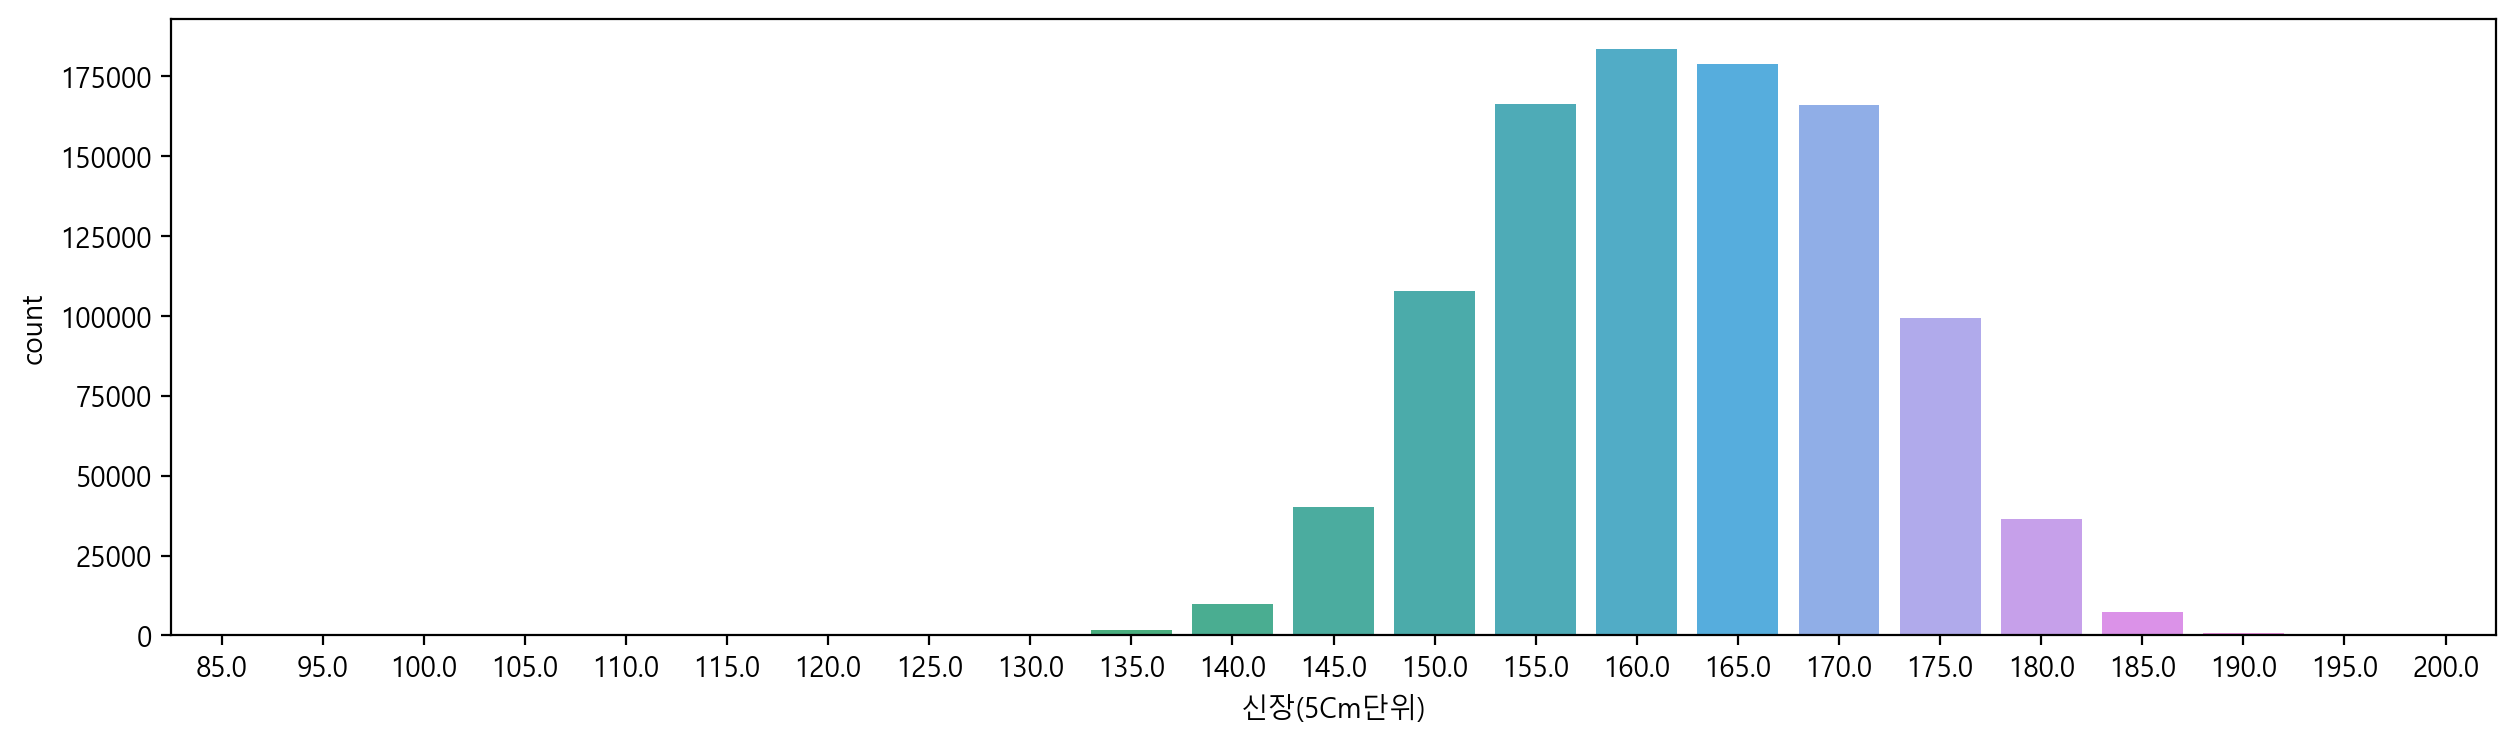

In [59]:
# 신장
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="신장(5Cm단위)")

<Axes: xlabel='체중(5Kg 단위)', ylabel='count'>

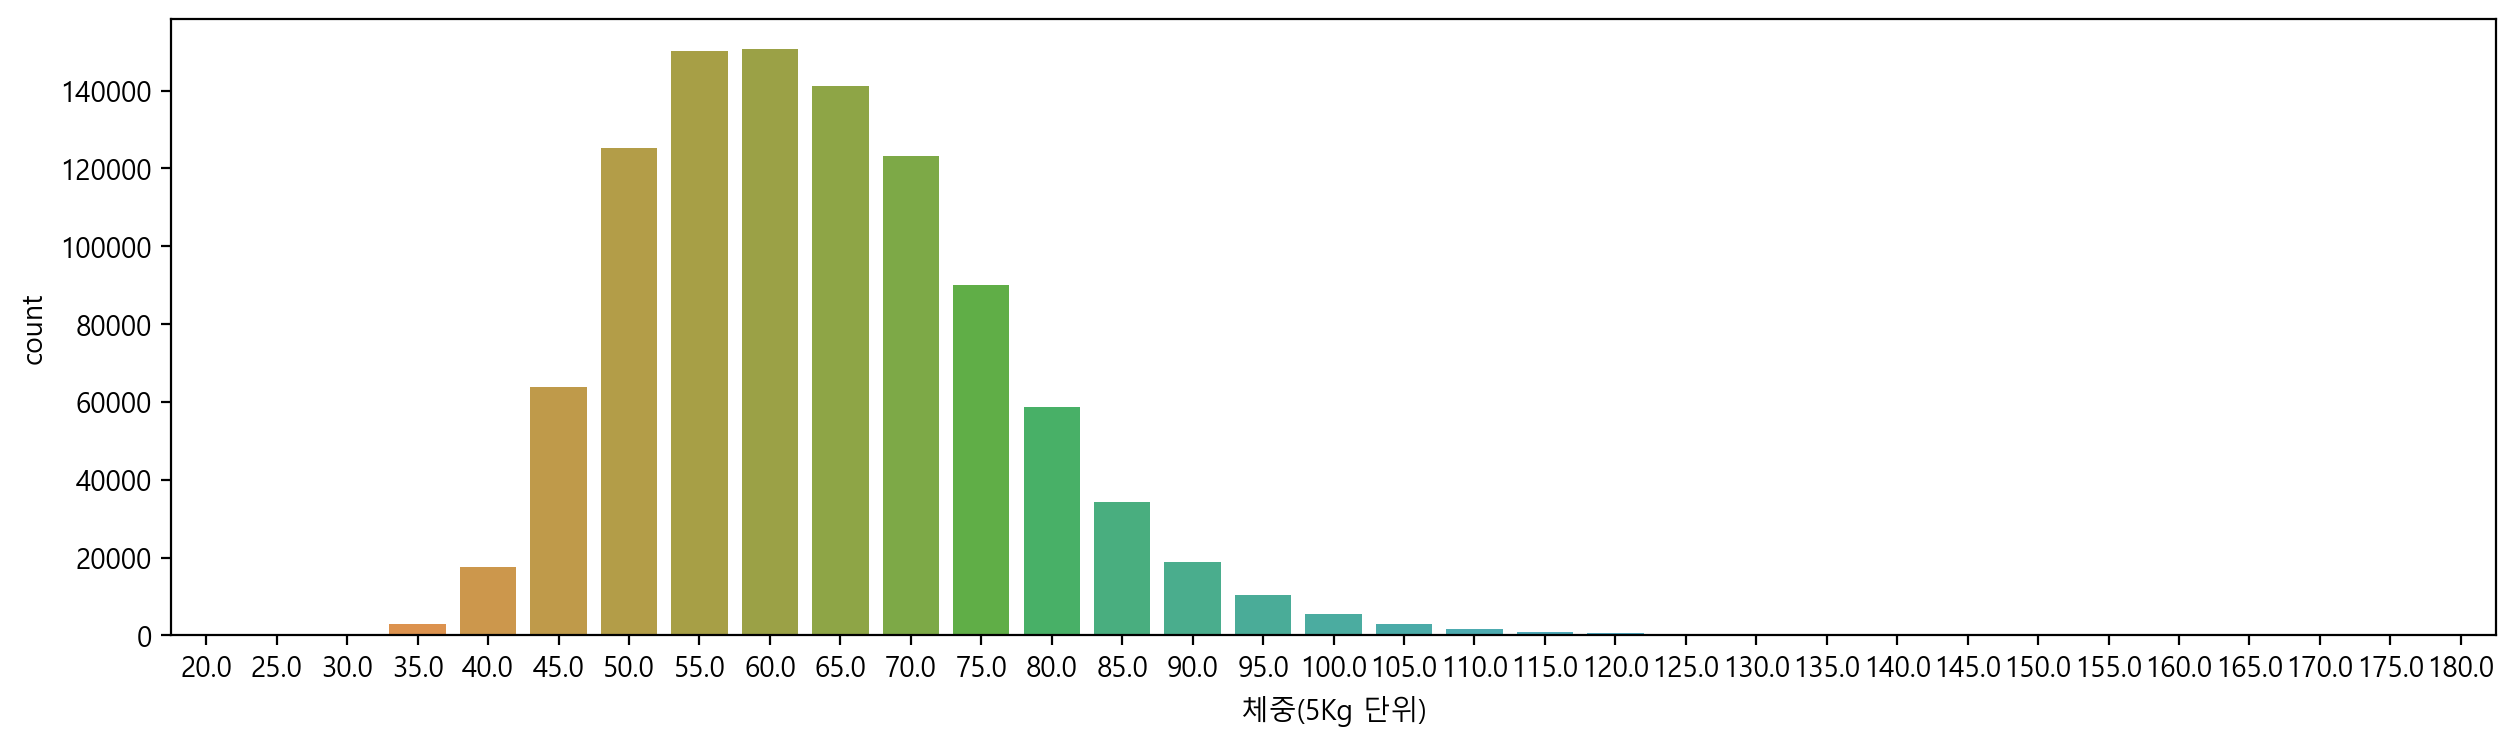

In [62]:
# 체중
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="체중(5Kg 단위)")

<Axes: xlabel='신장(5Cm단위)', ylabel='count'>

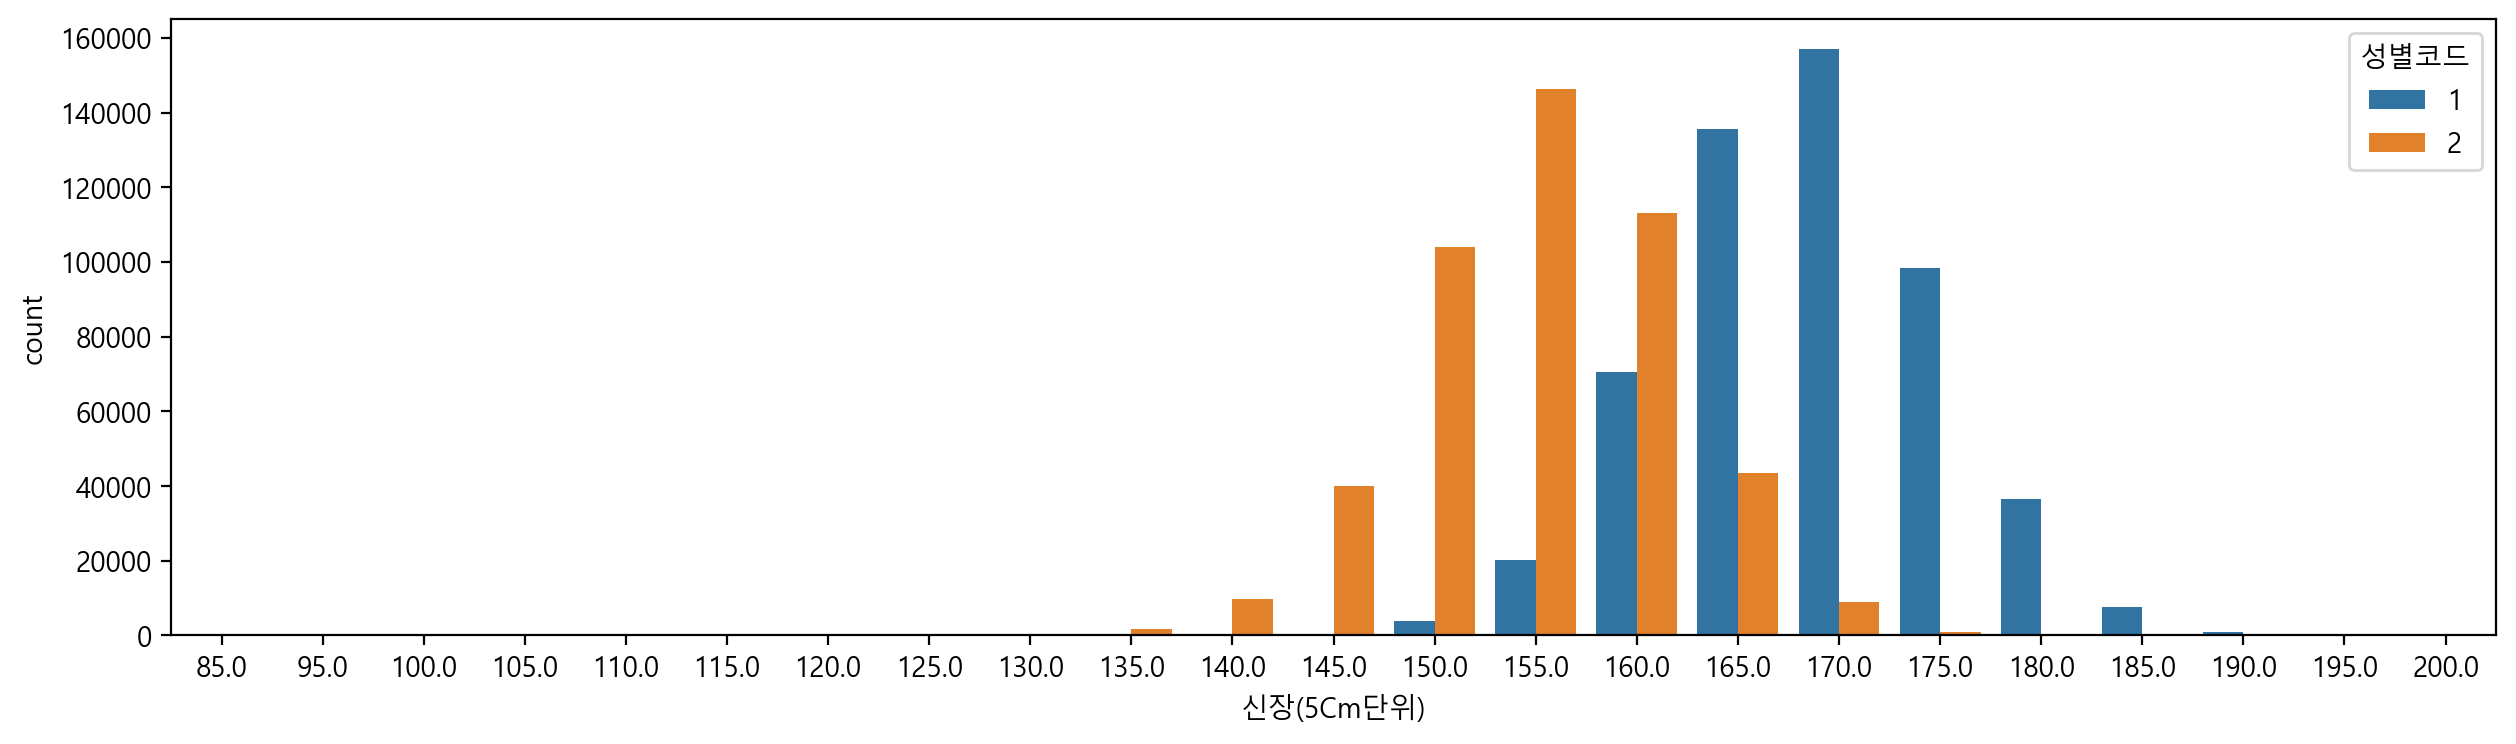

In [63]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="신장(5Cm단위)", hue="성별코드")

<Axes: xlabel='체중(5Kg 단위)', ylabel='count'>

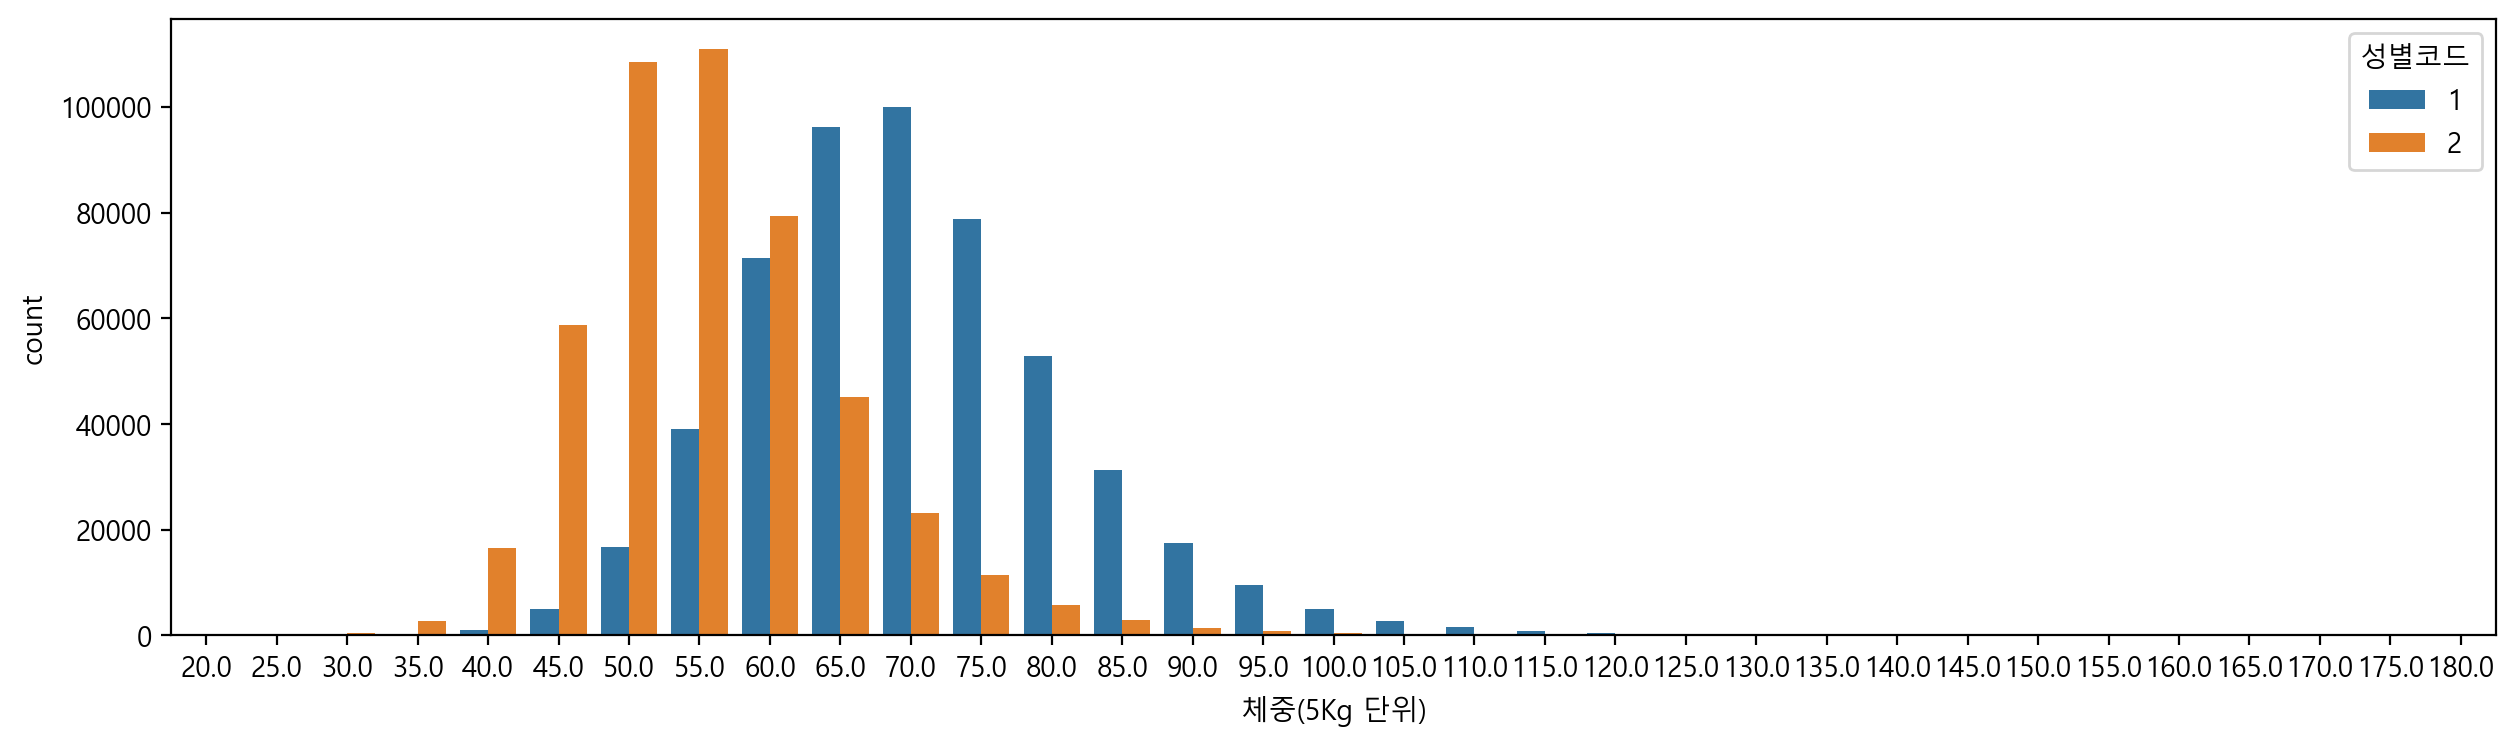

In [64]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="체중(5Kg 단위)", hue="성별코드")

### 14.4 brplot_수치형 vs 범주형 데이터 시각화

<Axes: xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

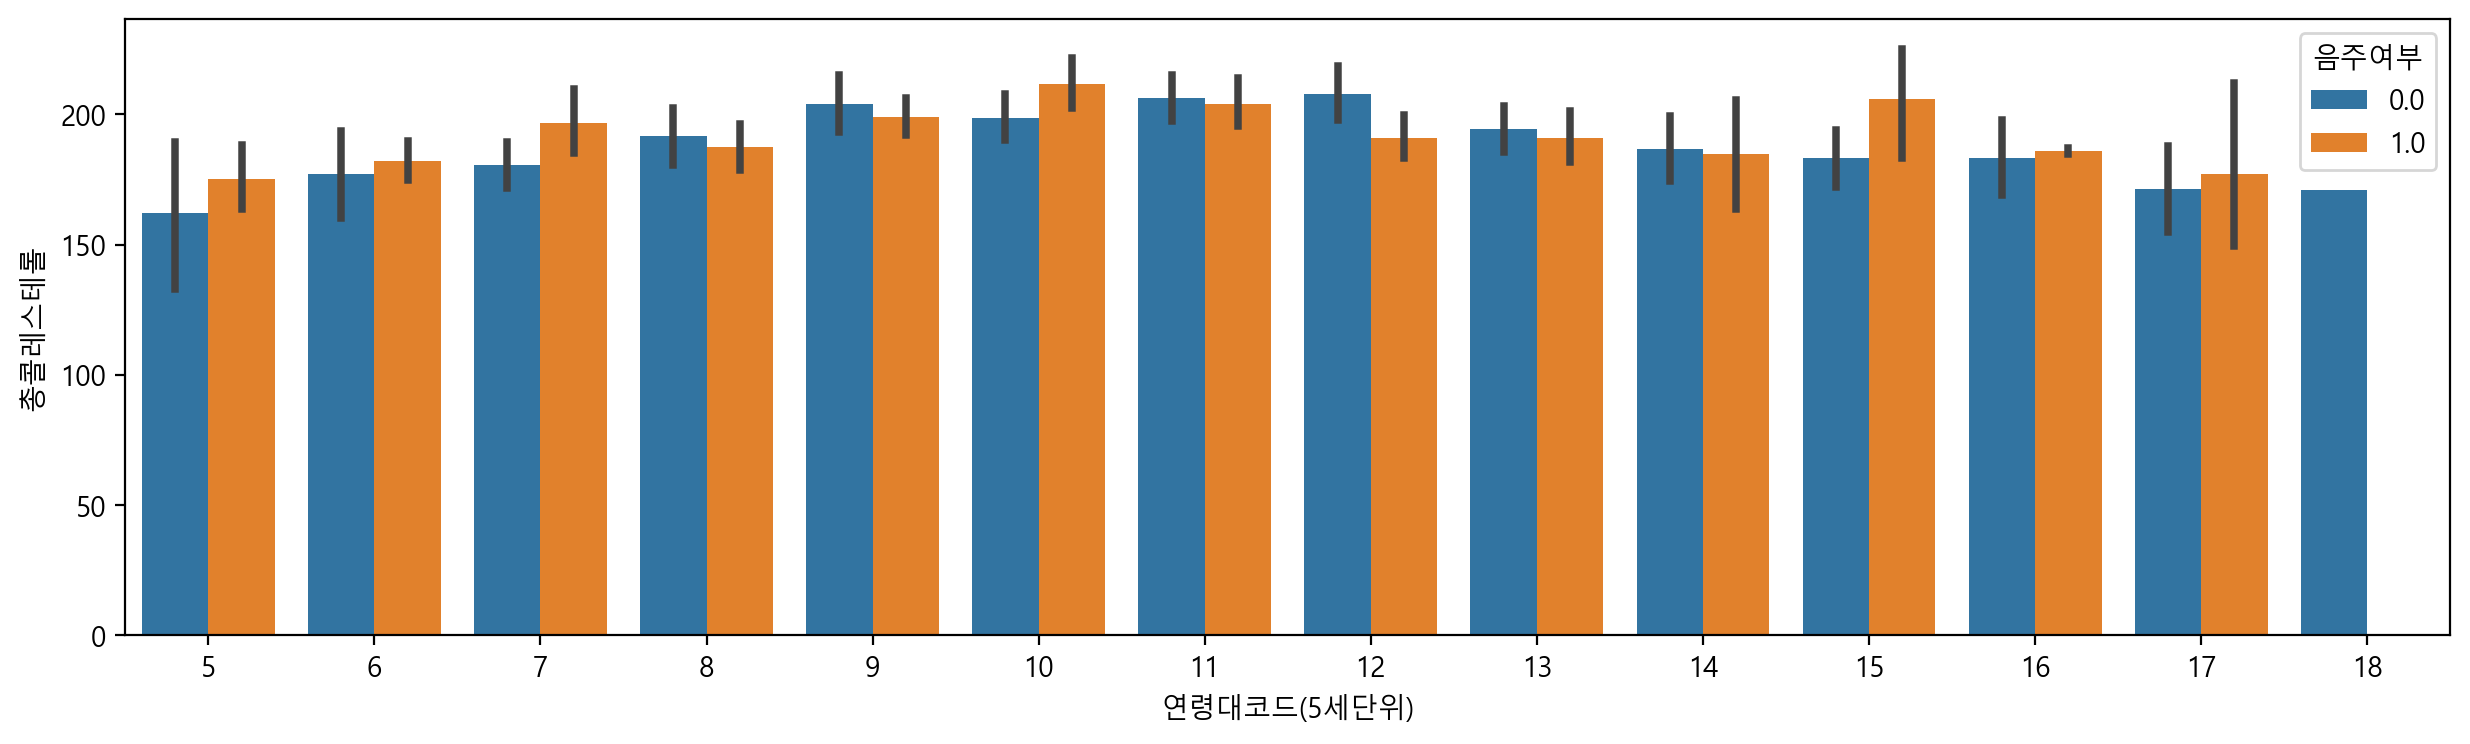

In [68]:
# 연령대코드와 총 콜레스테롤
plt.figure(figsize=(15,4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="음주여부")

<Axes: xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

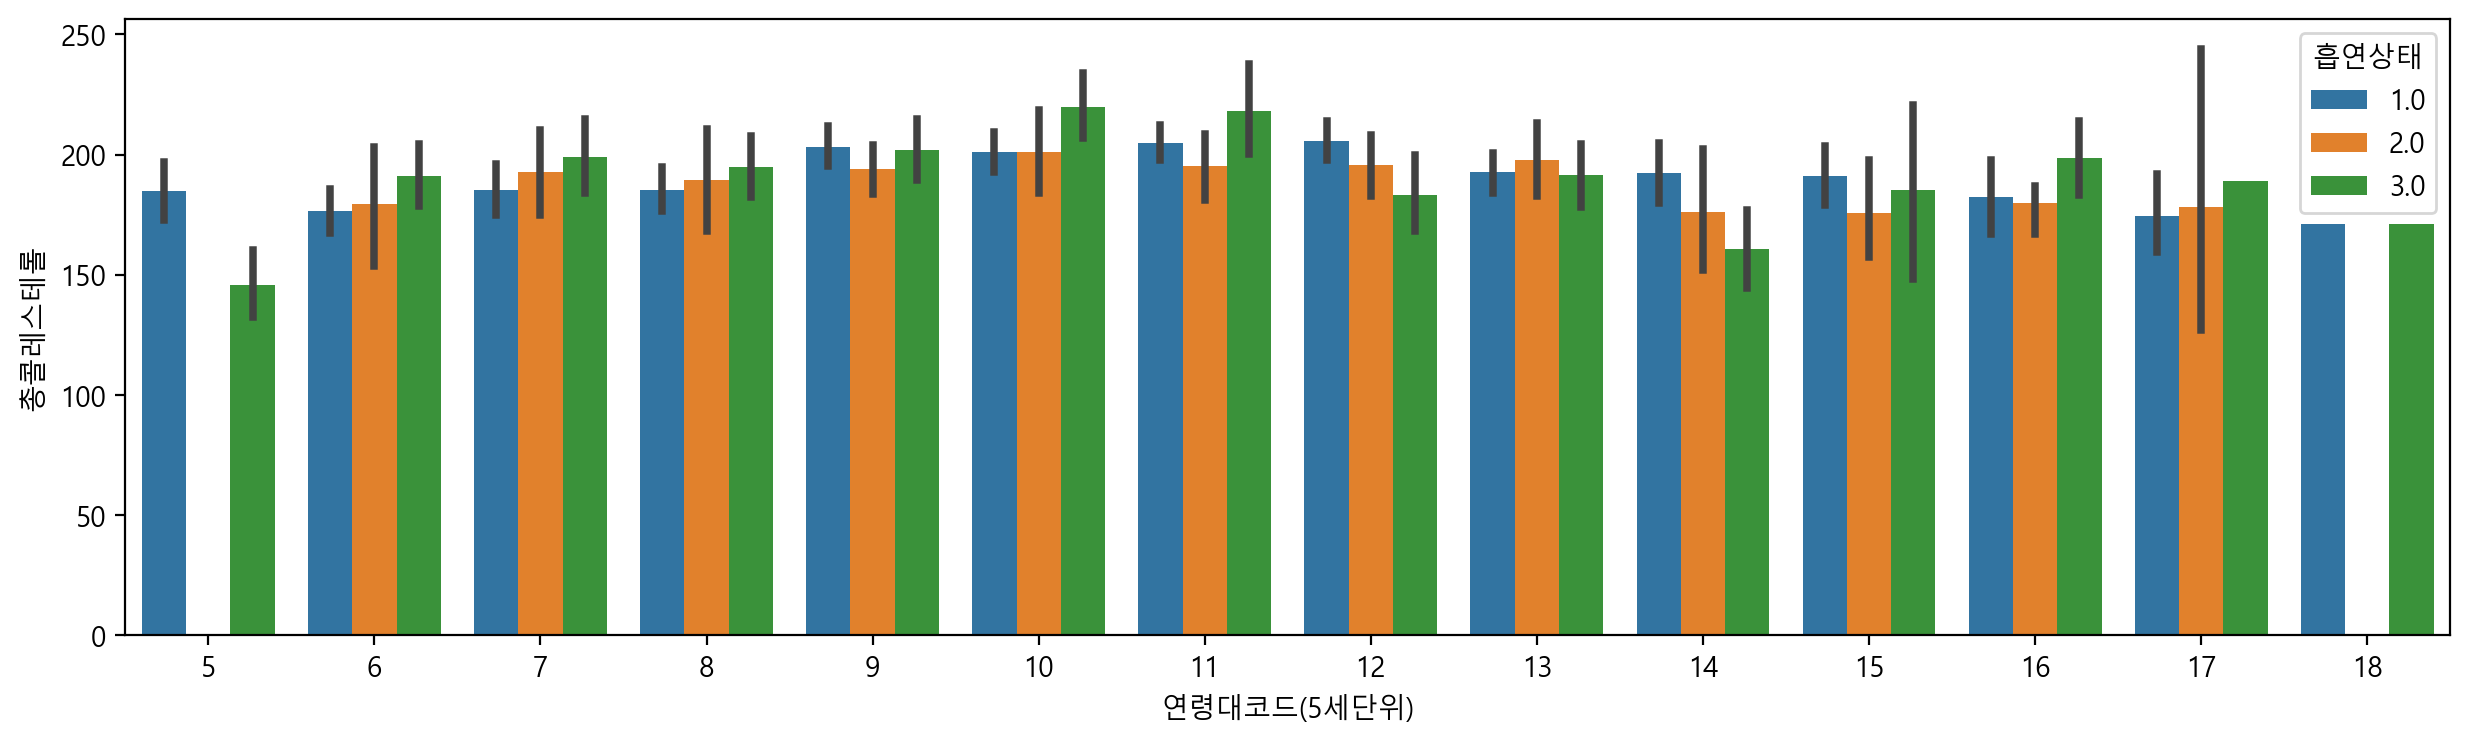

In [69]:

plt.figure(figsize=(15,4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="흡연상태")

<Axes: xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

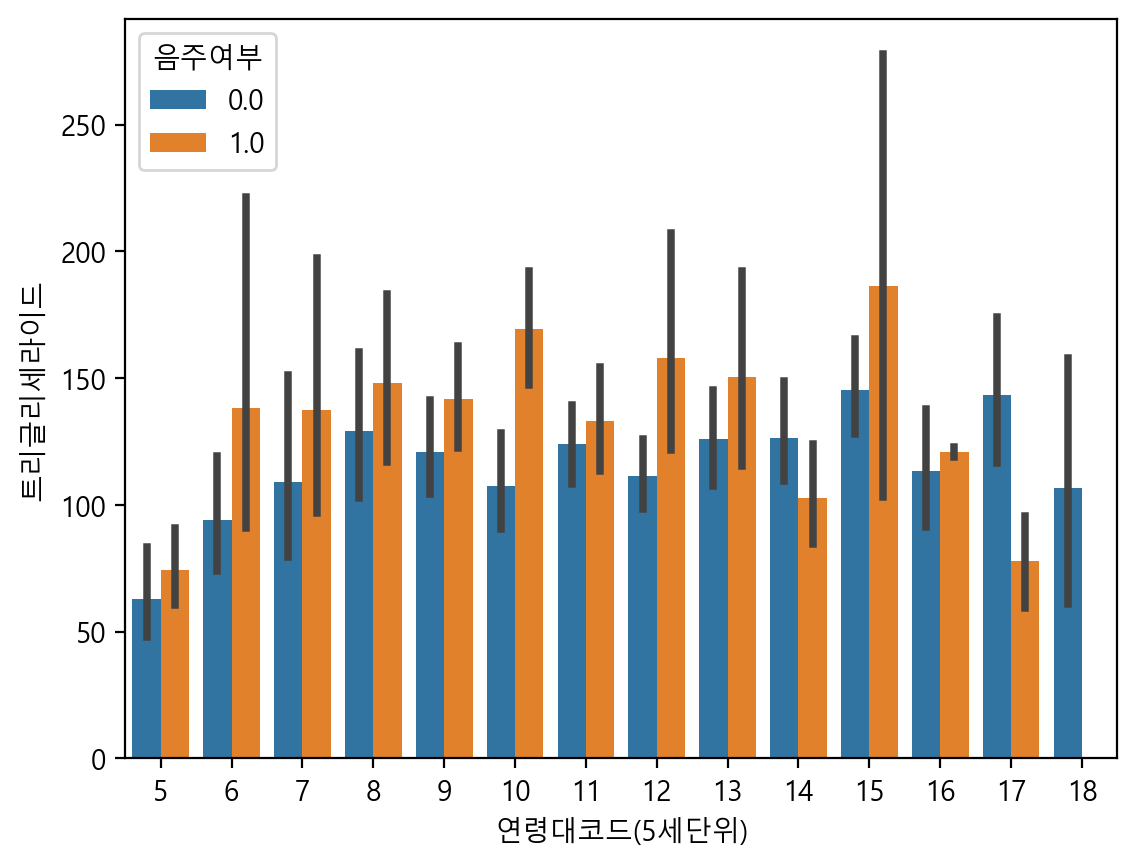

In [76]:
# 트리글리세라이드 (중성지방)에 따른 연령대코드(5세단위)를 음주여부
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부")

### 14.5 lineplot and poinplot

C:\Users\psy88_6c502t\AppData\Local\Temp\ipykernel_3552\3040516297.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드", ci="sd")


<Axes: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

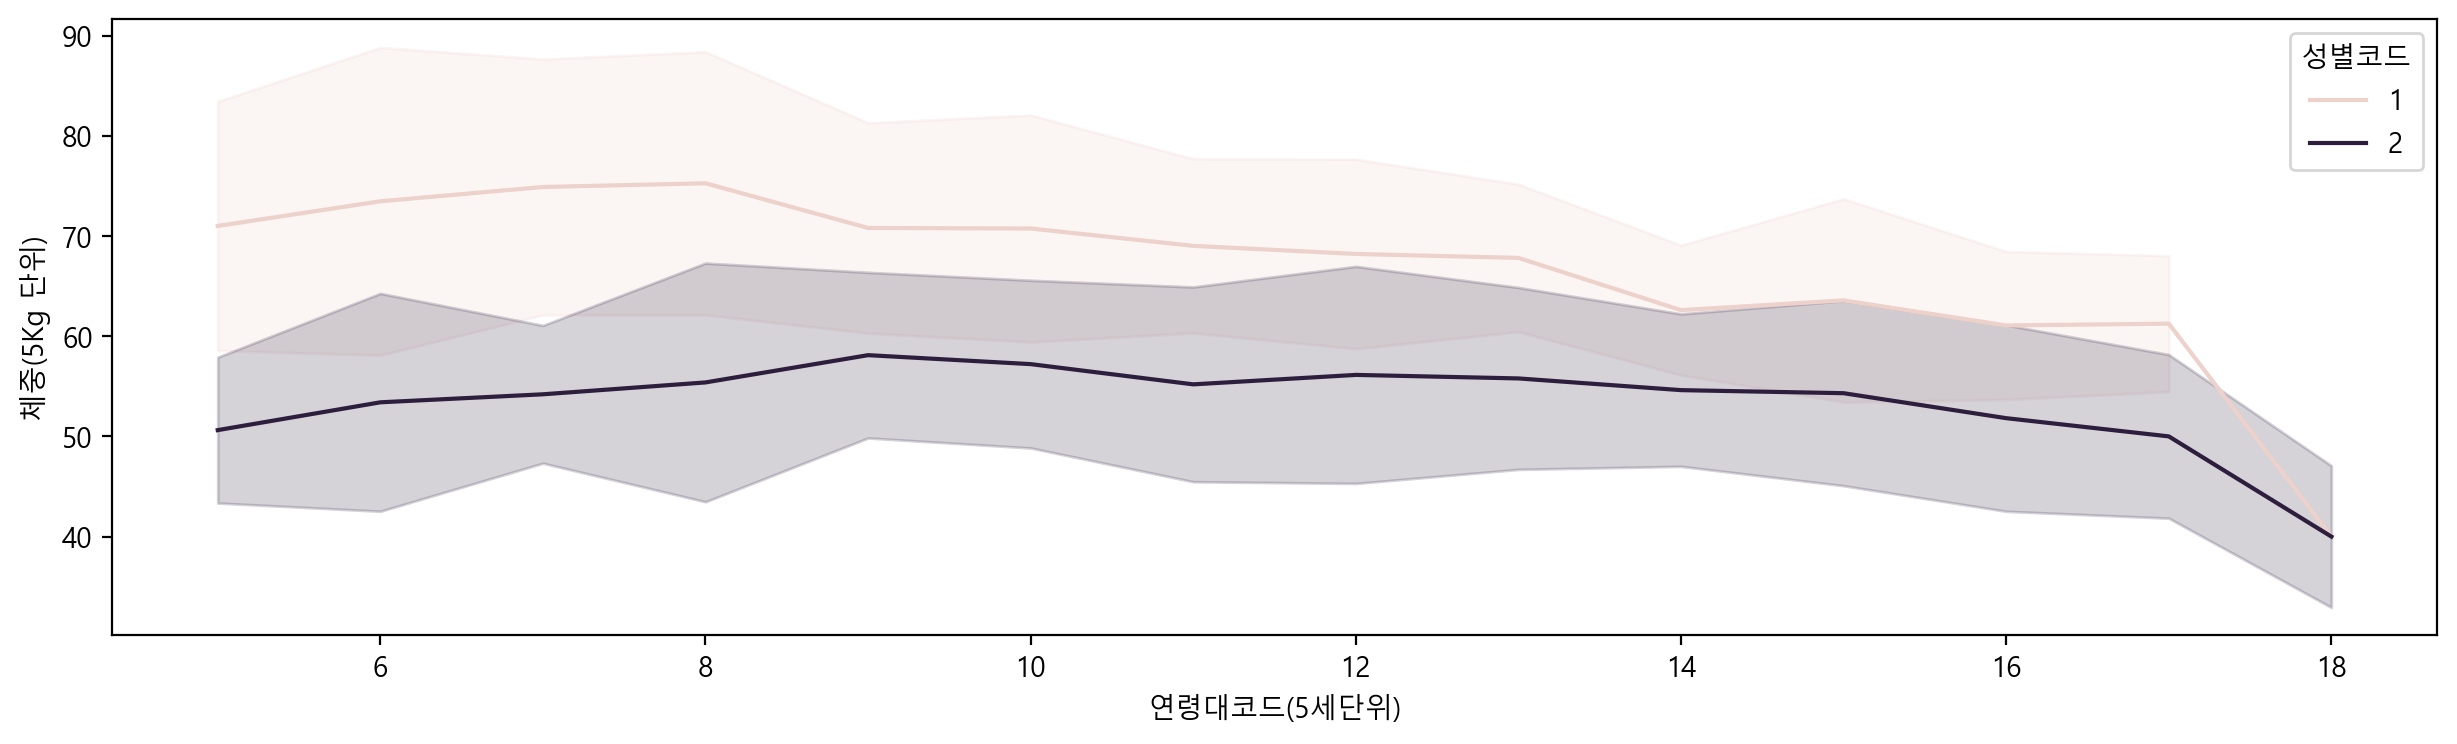

In [84]:
# 연령코드에 따른 체중
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드", ci="sd")

C:\Users\psy88_6c502t\AppData\Local\Temp\ipykernel_3552\2817561235.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")


<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

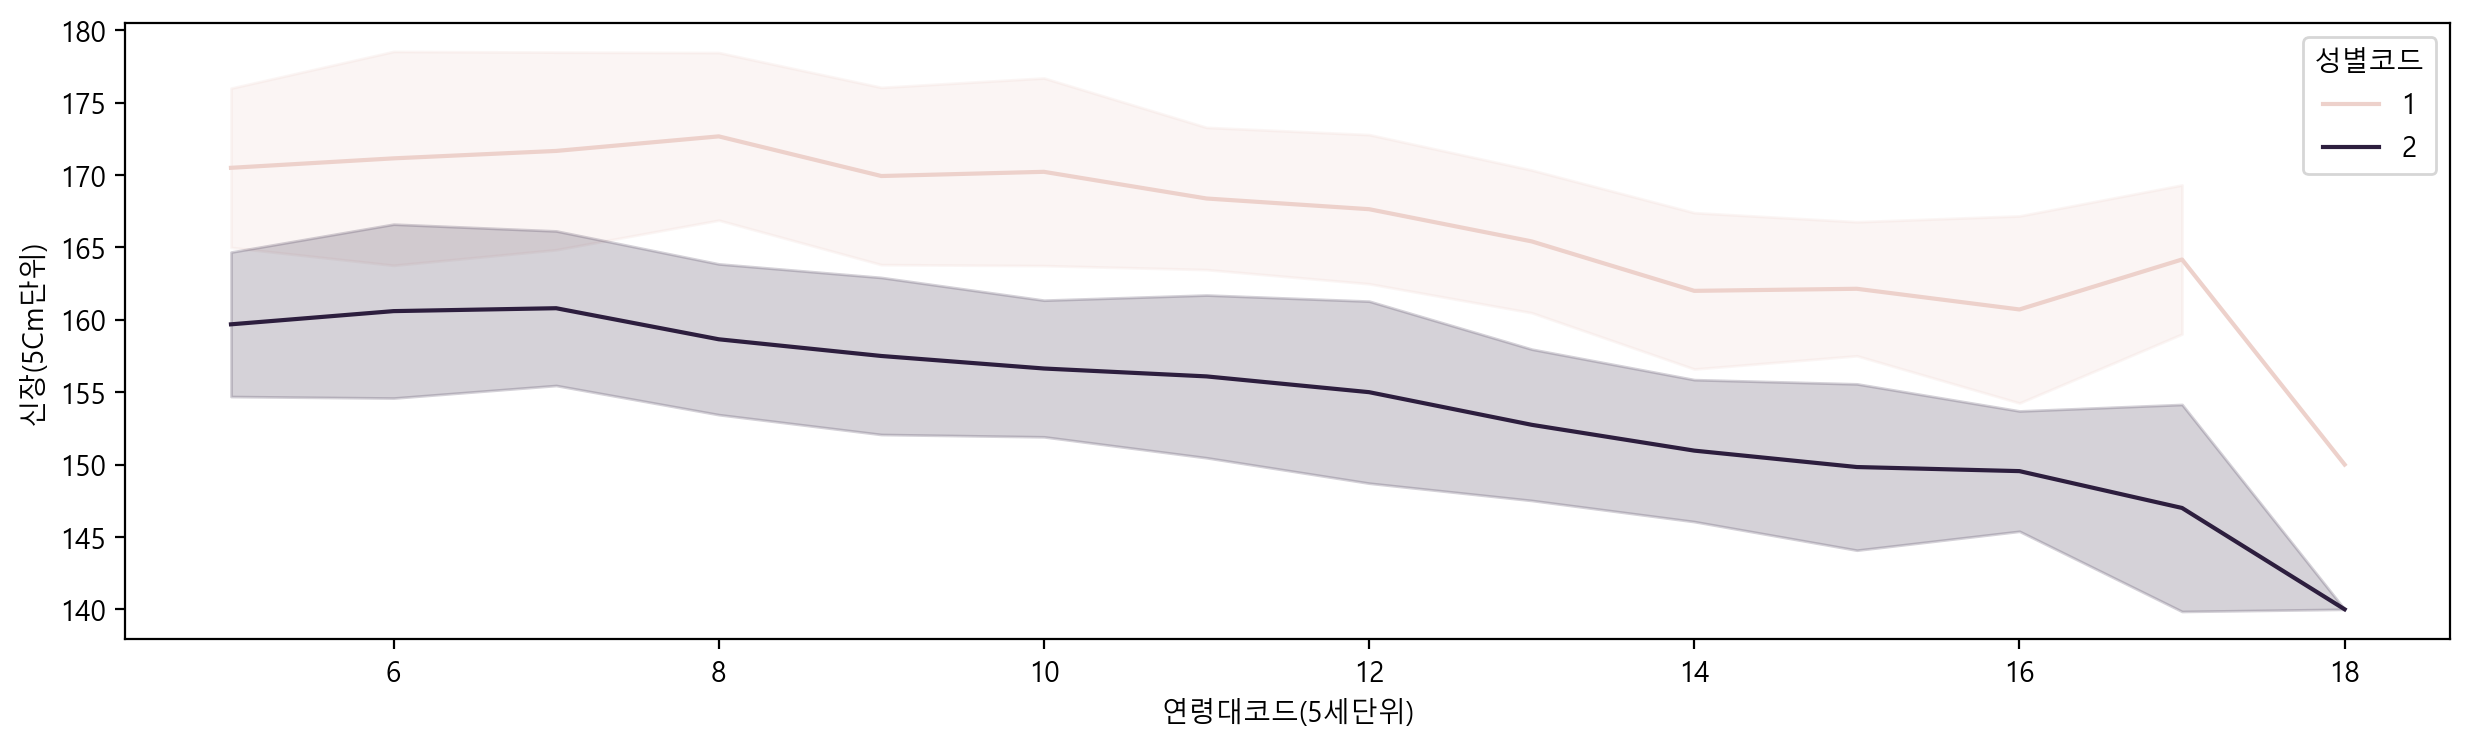

In [85]:
# 연령대코드에 따른 신장

plt.figure(figsize=(15, 4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")

C:\Users\psy88_6c502t\AppData\Local\Temp\ipykernel_3552\2798137756.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="음주여부", ci="sd")
C:\Users\psy88_6c502t\AppData\Local\Temp\ipykernel_3552\2798137756.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="음주여부", ci="sd")


<Axes: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

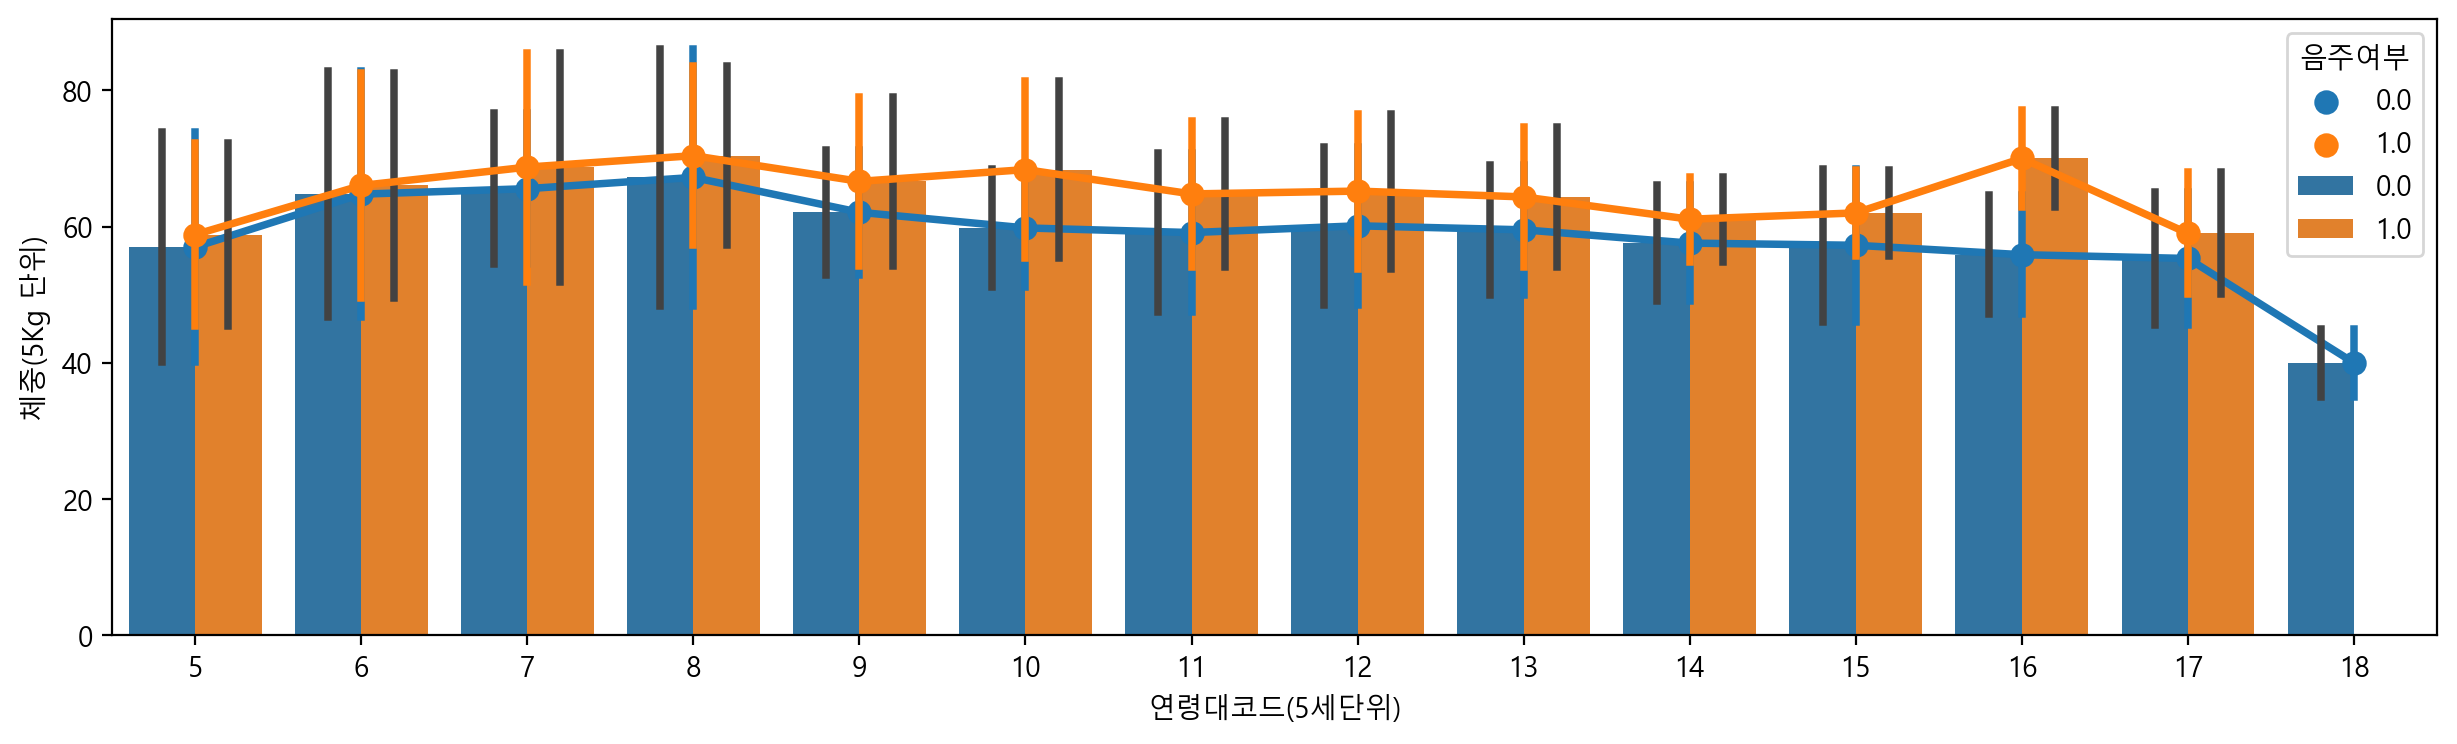

In [88]:
# 연령코드에 따른 체중을 음주여부
plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="음주여부", ci="sd")
sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="음주여부", ci="sd")

C:\Users\psy88_6c502t\AppData\Local\Temp\ipykernel_3552\2273160098.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", ci=None)


<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

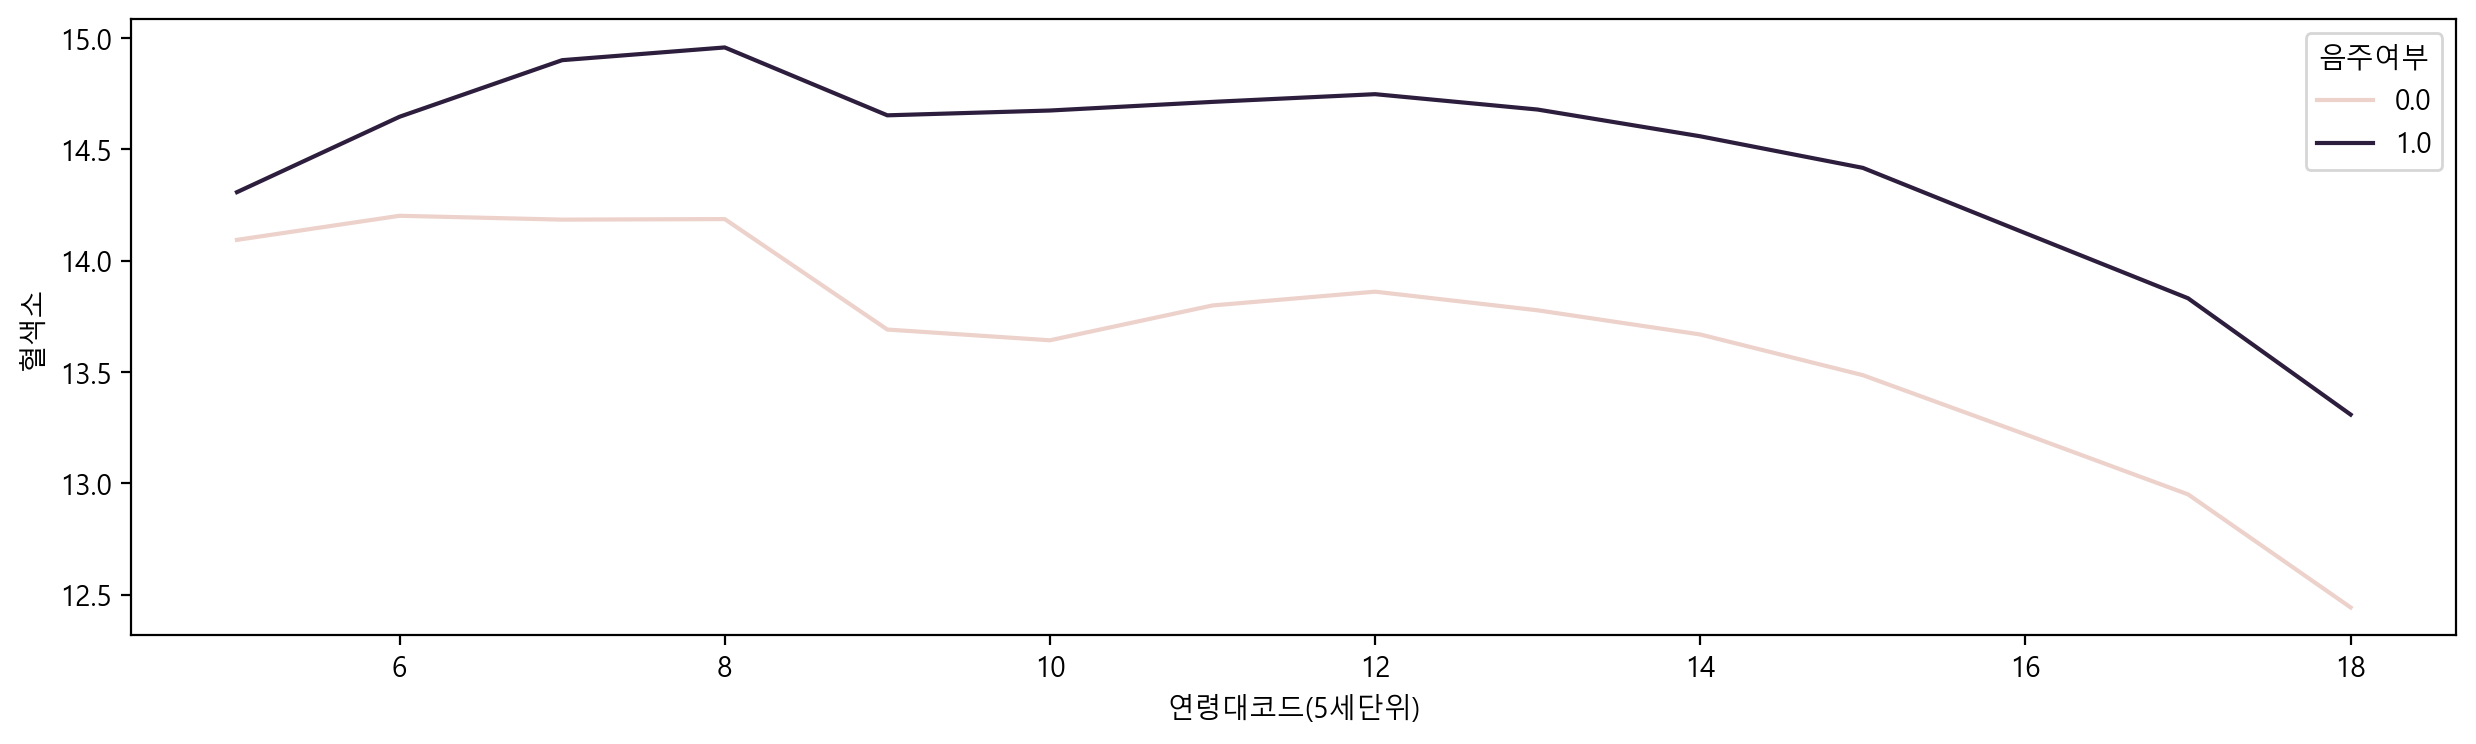

In [90]:
# 연령대코드에 따른 혈색소를 음주여부

plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", ci=None)

### 14.6 boxplot

- 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라 자료로 부터 얻어낸 통계량인 5가지 요약 수치로 그림
- 5가지 요약 수치랑 기술통계학에서 자료의 정보를 알려주는 다섯 가지 수치
    1. 최솟값
    2. 제1사분위수
    3. 제2사분위수() = 중앙값
    4. 제3사분위수
    5. 최댓값
- boxplot은 박스와 수염이 있는 모양이어서 box and whisker plot
- 특정 column 값들을 boxplot으로 그릴 수 있음
- 박스의 밑은 1사분위수, 중간은 2사분위수, 위는 3사분위수

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

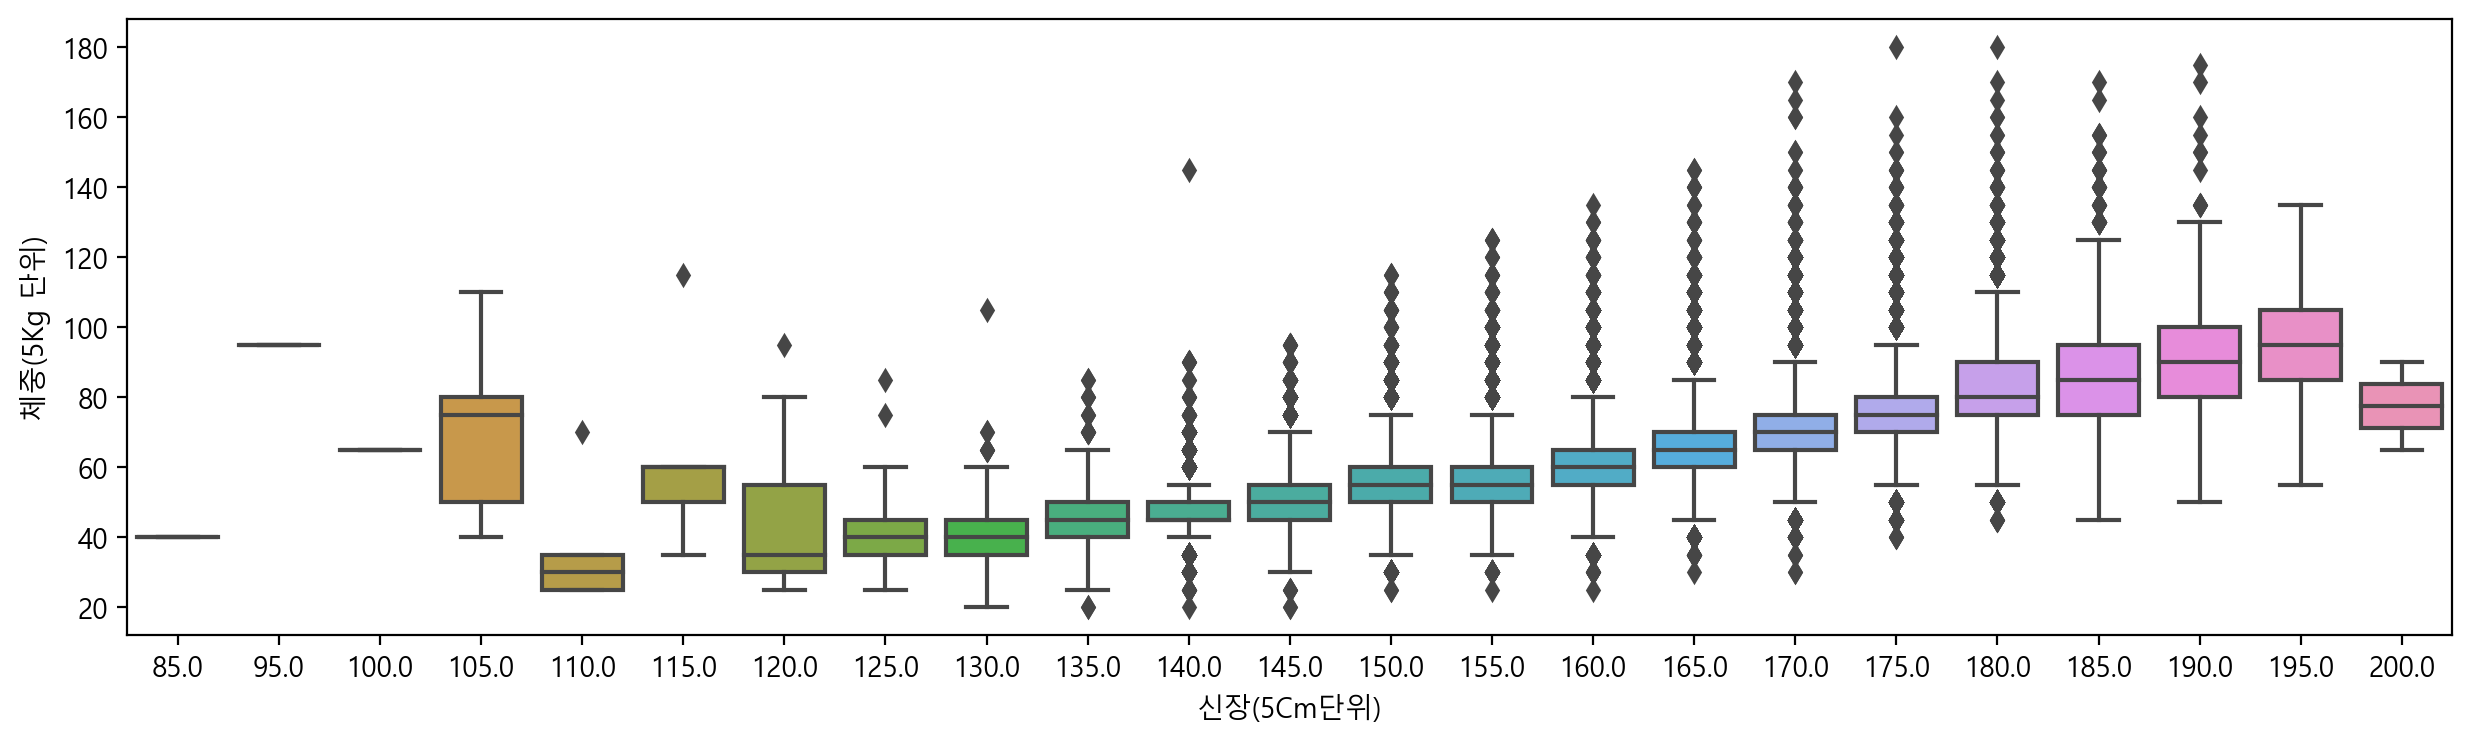

In [91]:
# 신장에 따른 체중
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)")

### 14.7 violinplot

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

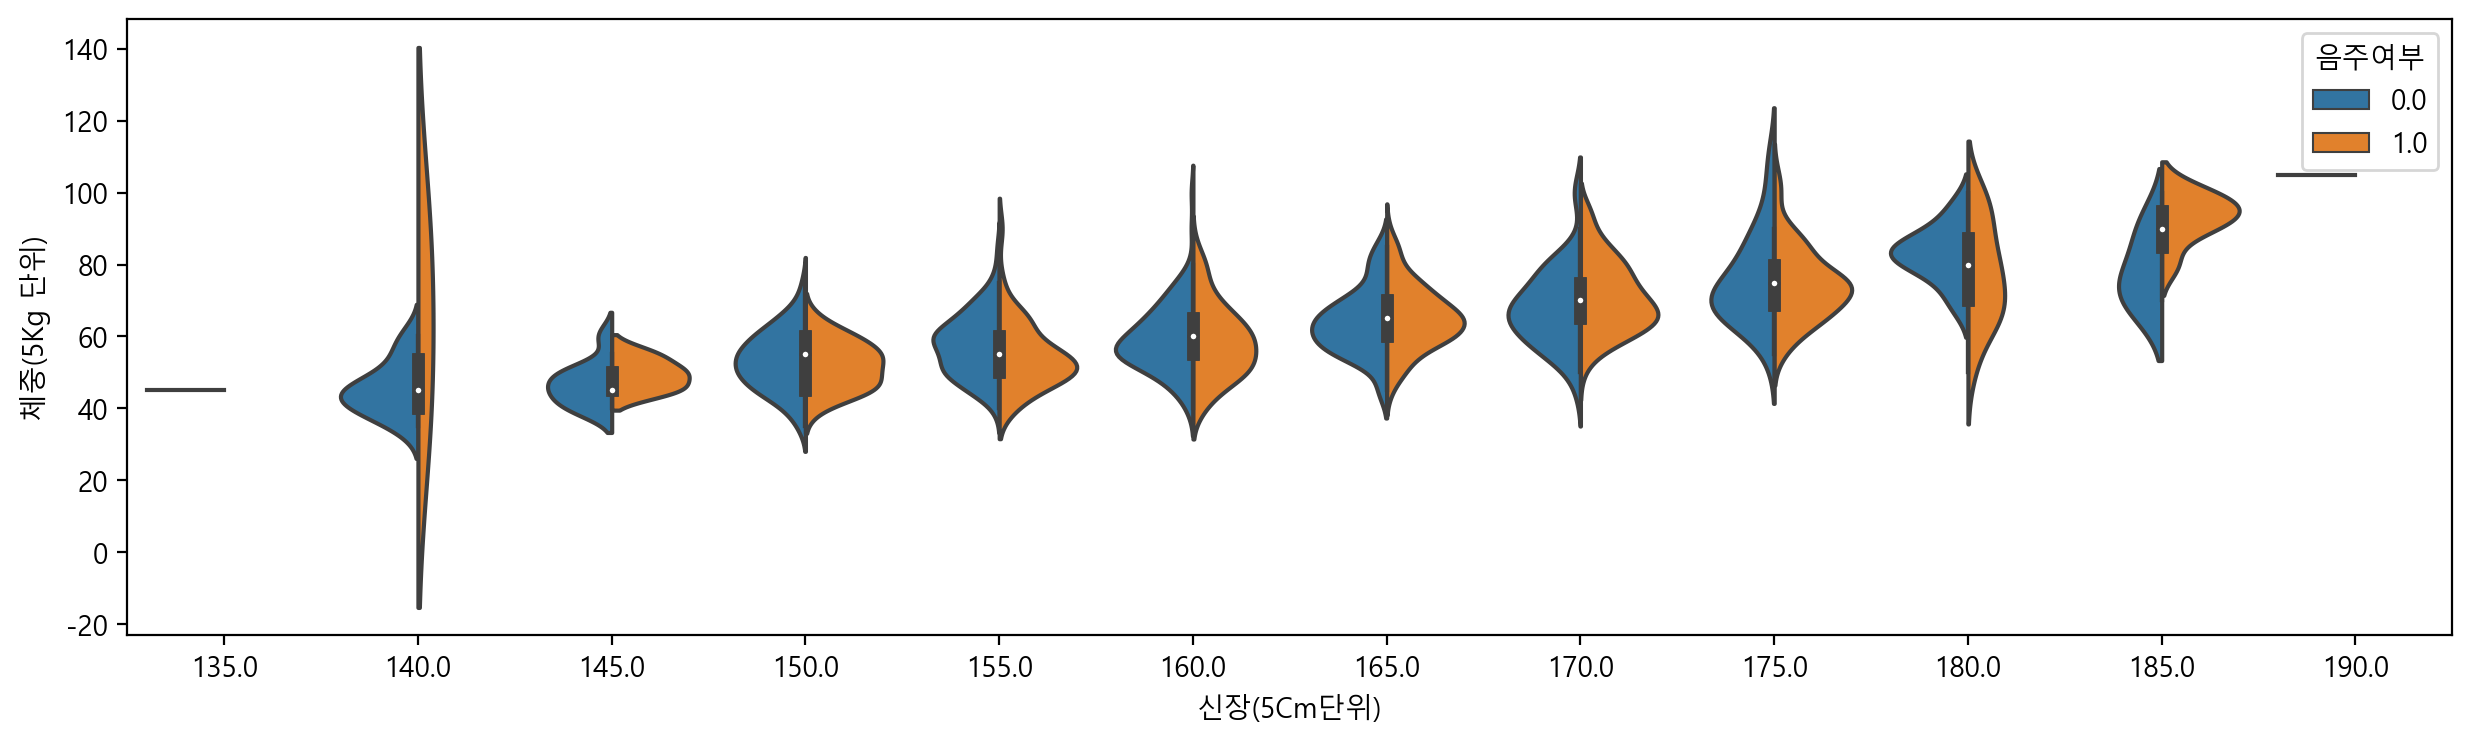

In [96]:
# 신장에 따른 체중 음주여부에 따라 다른 색상
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부", split=True)

<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

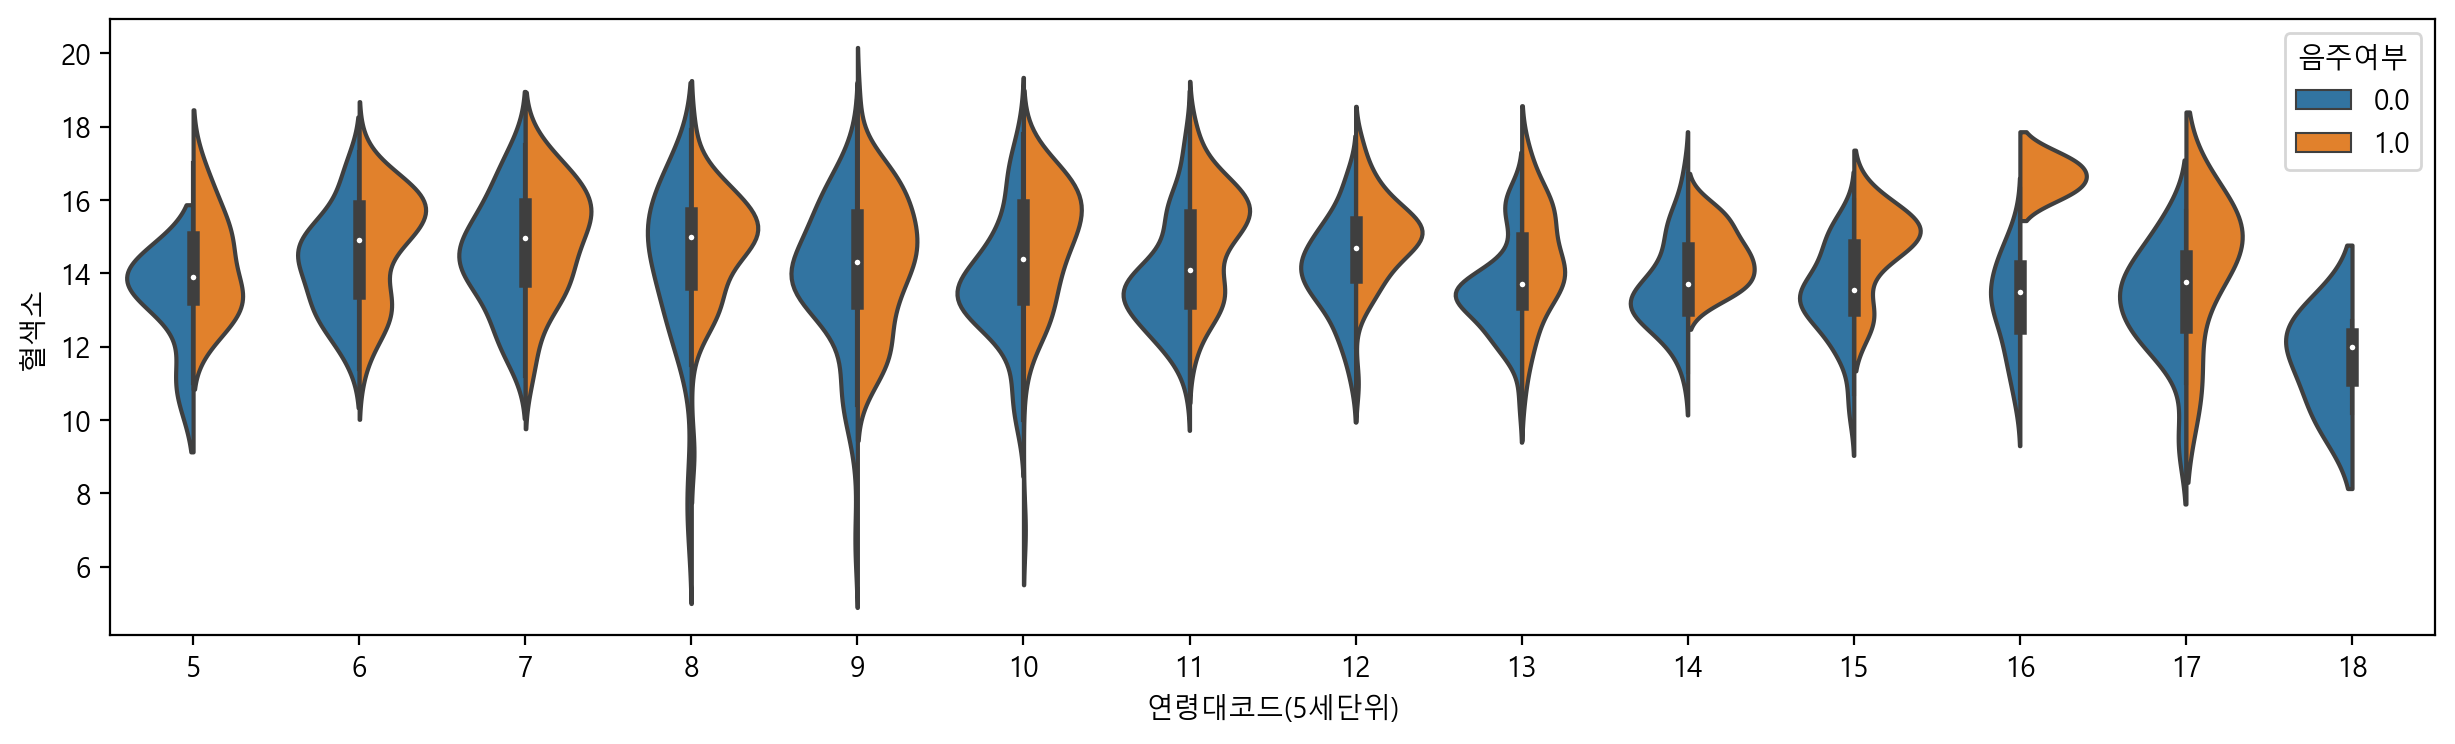

In [97]:
# 연령대에 따른 혈색소 음주여부에 따라 다른 색상
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", split=True)

### 14.8 swarmplot
- 범주형 데이터를 산점도로 시각화

C:\Users\psy88_6c502t\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\psy88_6c502t\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\psy88_6c502t\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\psy88_6c502t\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\psy88_6c502t\anaconda3\Lib\site-packages\seaborn\categorical.py:354

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

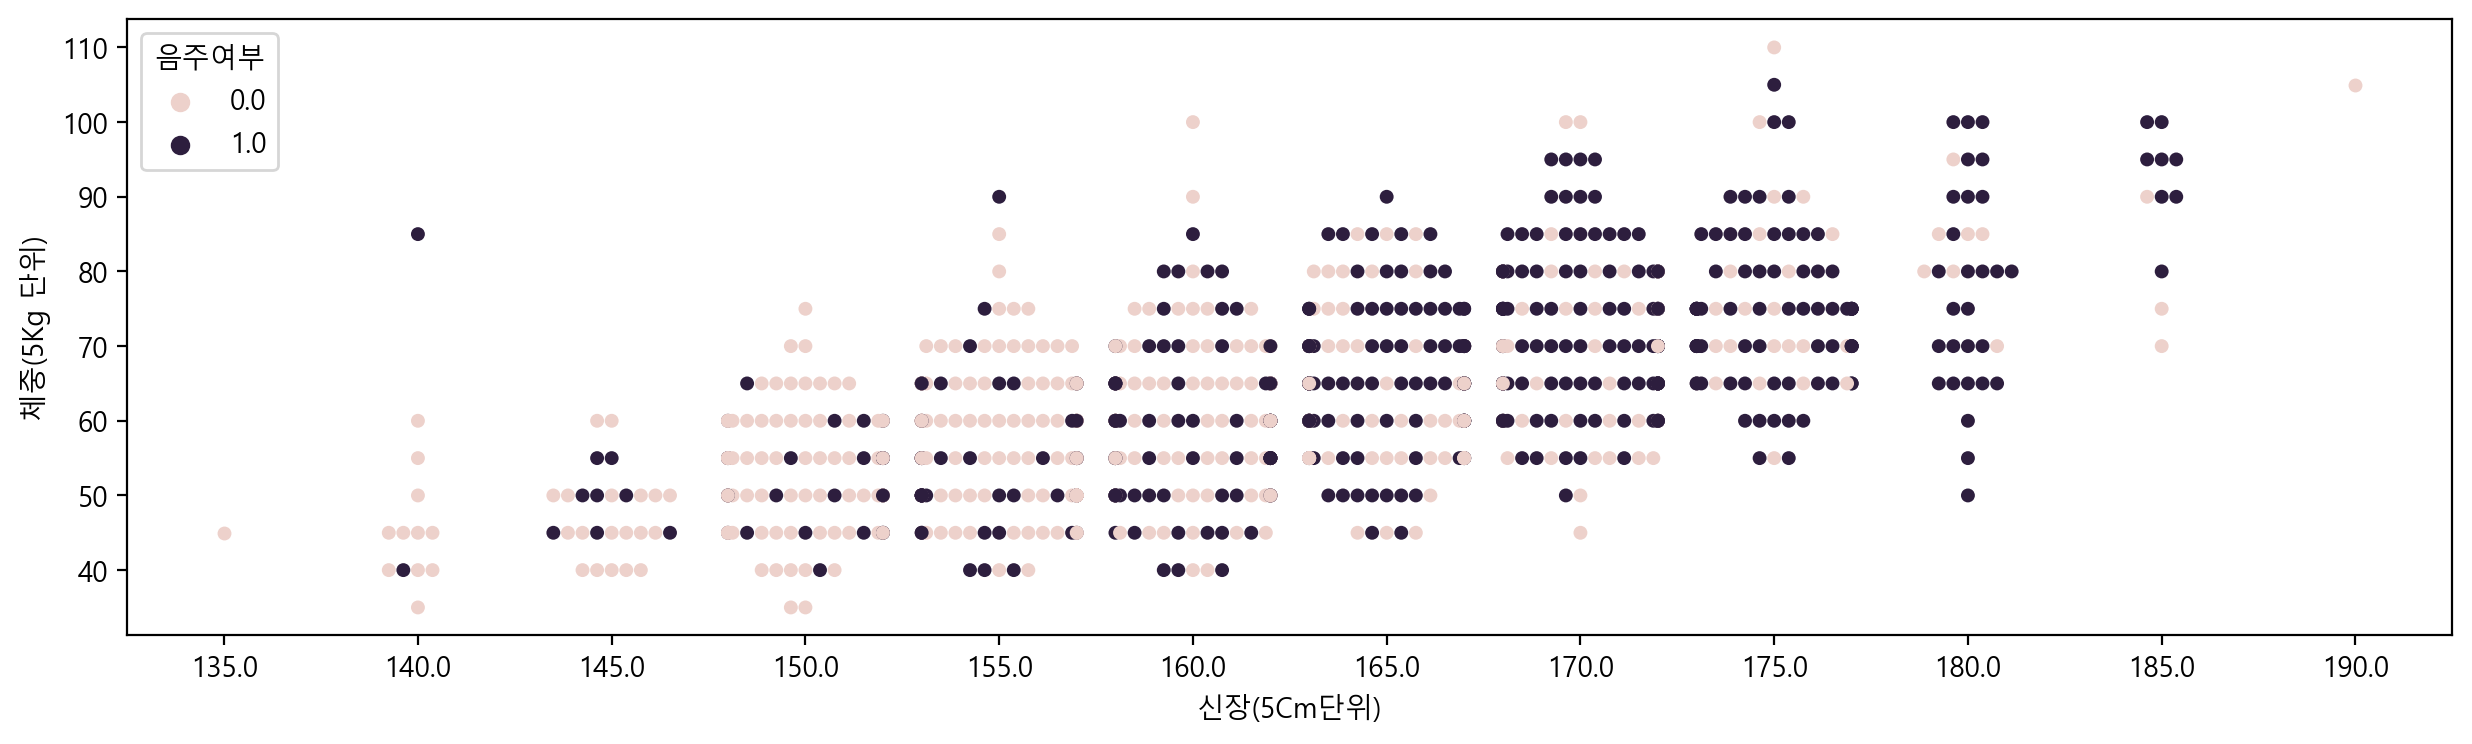

In [98]:
# 신장에 따른 체중 음주여부에 따라 다른 색상
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

C:\Users\psy88_6c502t\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\psy88_6c502t\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\psy88_6c502t\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\psy88_6c502t\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\psy88_6c502t\anaconda3\Lib\site-packages\seaborn\categorical.py:354

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

C:\Users\psy88_6c502t\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\psy88_6c502t\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\psy88_6c502t\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\psy88_6c502t\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\psy88_6c502t\anaconda3\Lib\site-packages\seaborn\categorical.py:354

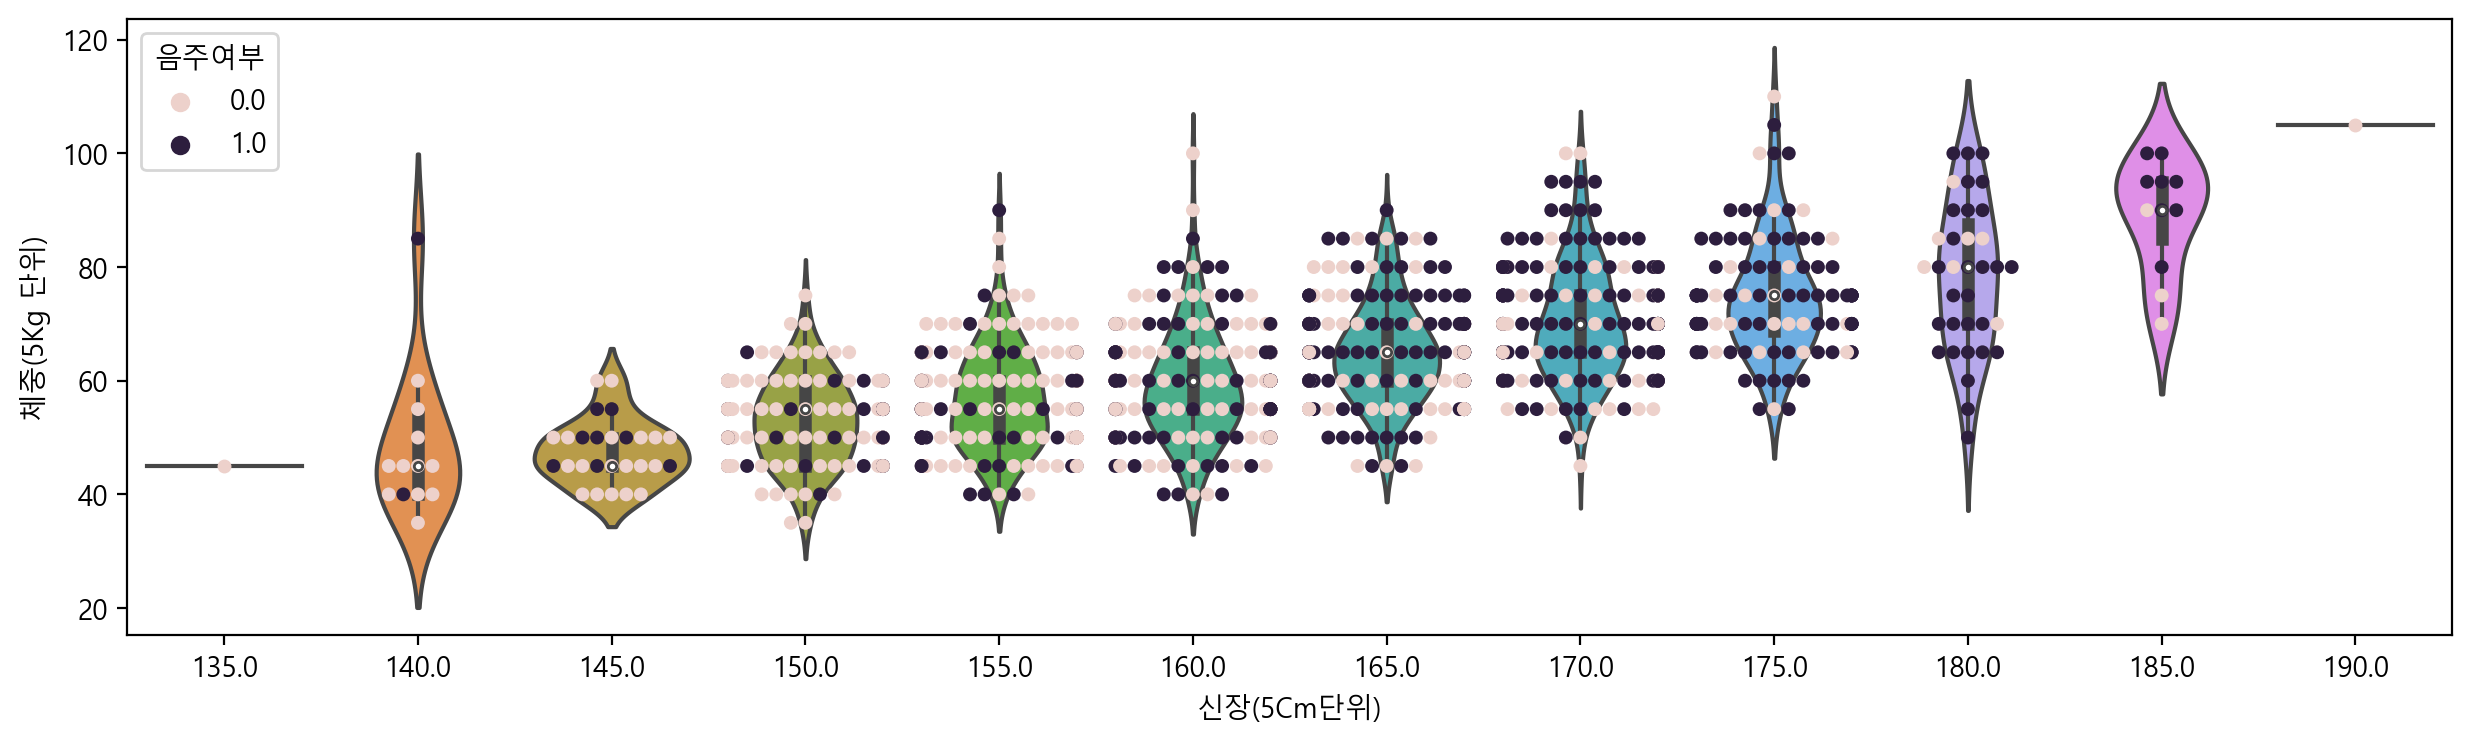

In [99]:
# 같이 표현 가능
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)")

C:\Users\psy88_6c502t\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\psy88_6c502t\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\psy88_6c502t\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\psy88_6c502t\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

C:\Users\psy88_6c502t\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


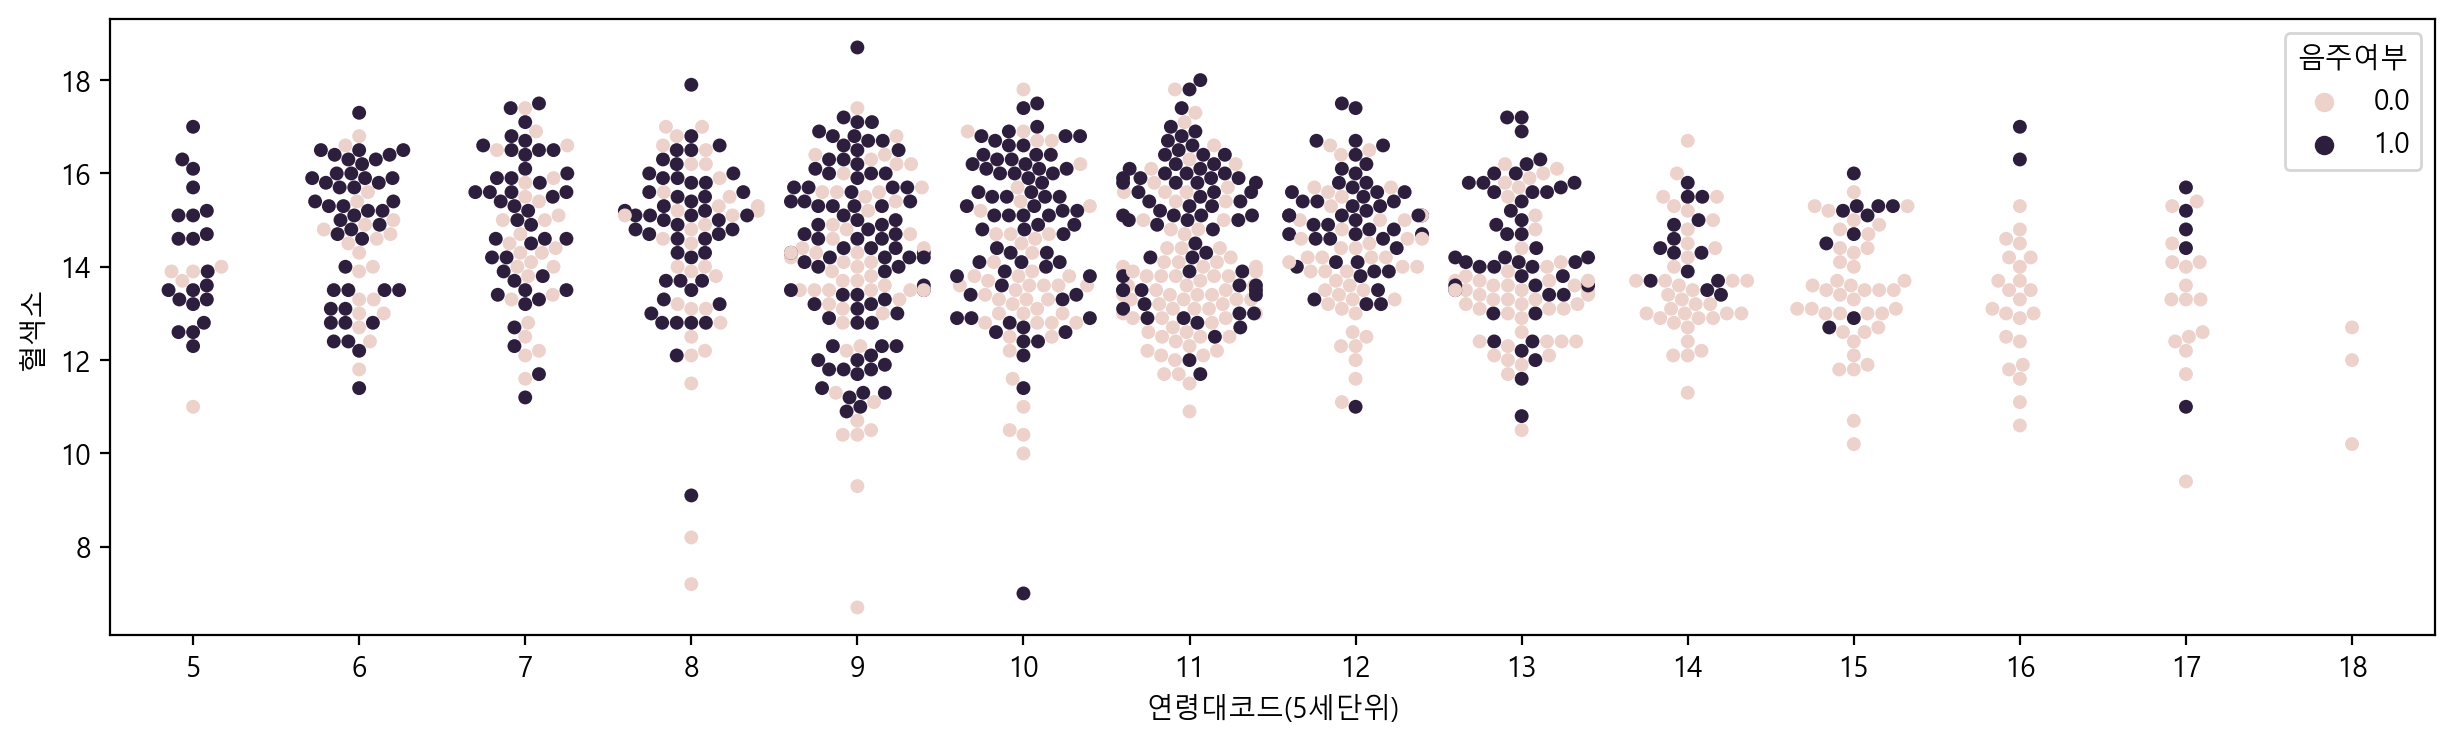

In [100]:
# 연령코드에 따른 음주여부 성별코드에 따라 다른 색상
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부")

C:\Users\psy88_6c502t\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


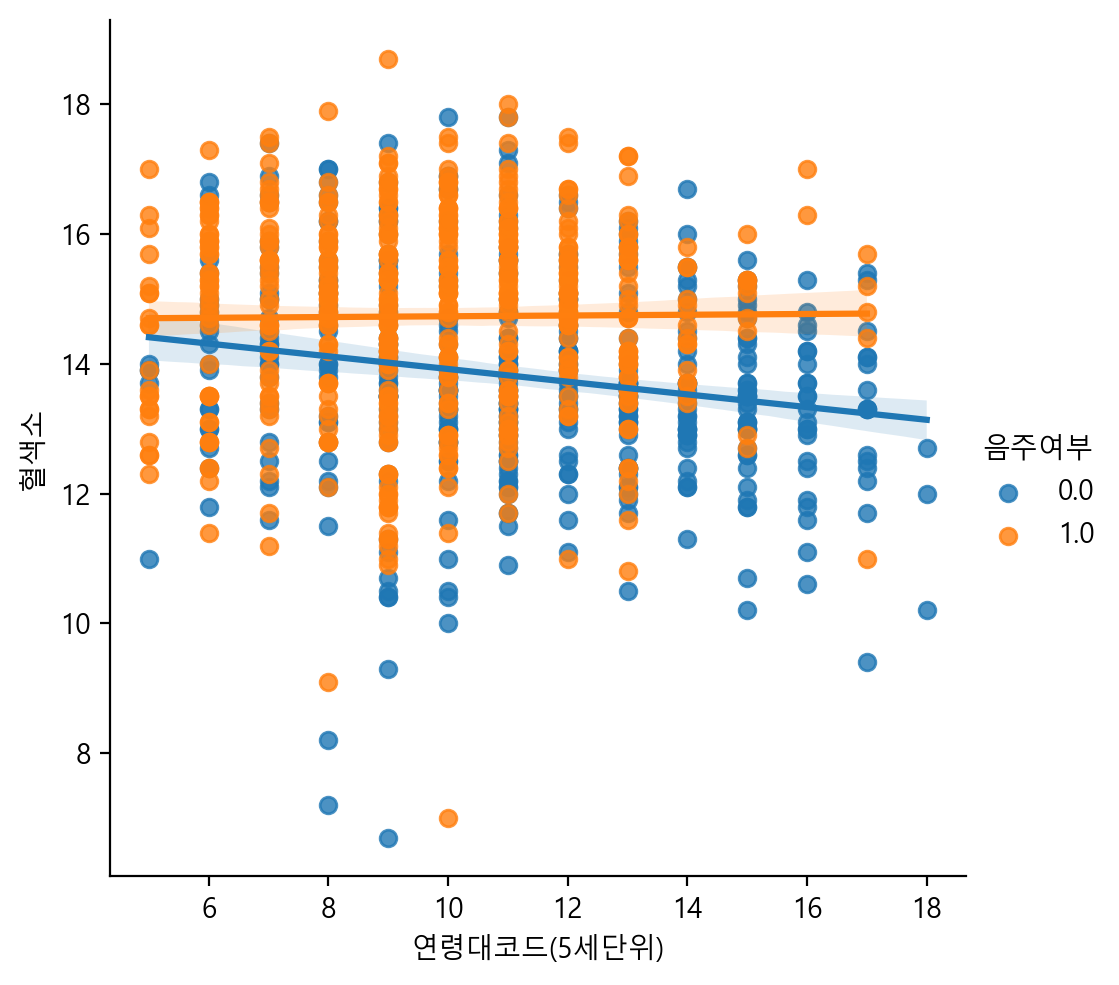

In [101]:
# lmplot
sns.lmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부")

C:\Users\psy88_6c502t\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


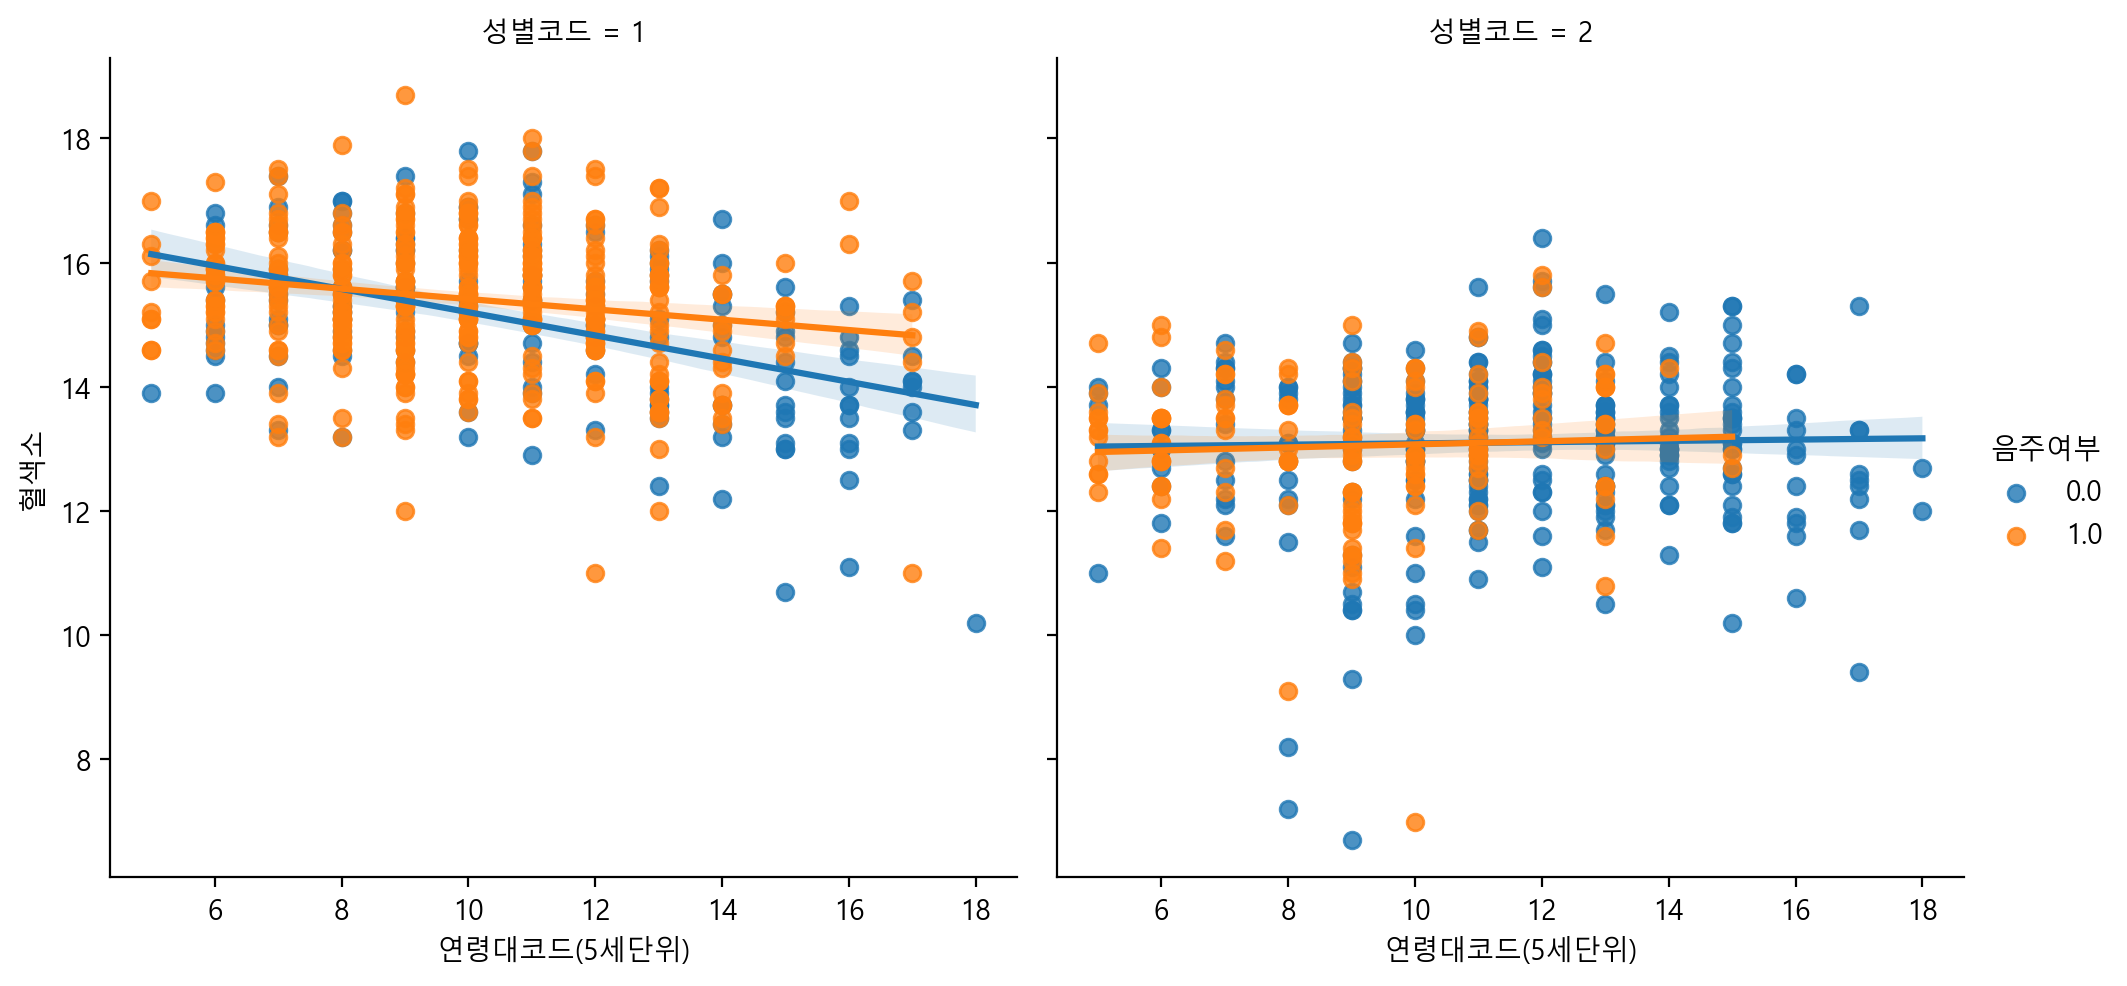

In [102]:
# col 옵션으로 데이터 분류
sns.lmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", col="성별코드")